# Narrative Flow of Men and Women



 ### Hypothesis:

Solidarity and social relations were different in the men and women sections of Birkenau; men and women recall them in different ways and in different context; solidarity and social bonds have different place in the narratives of men and women.

If the hypothesis is true:
- the story line (or narrative flow) leading to the discussion of sociability and solidarity is different in testimonies of men and women; the most likely sequences of topics (to be named narrative pathway) leading to topics describing solidarity and sociability are different
- different amount of traffic is going through  similar pathways leading to solidarity and sociability
- either different nodes (to be named priming topics) are preceding and following (to be named exit topics) topics of solidarity and sociability or if they are similar transitions to them happen at different intensitiy


Key research questions to be studied here:
- What are the major pathways between the memory of arrival to Birkenau and leaving from Birkenau?
- How are nodes related to solidarity (food sharing, aid giving) and social bonds (friends, social bonds, family) are situated along the major pathways? For women and men, are they peripheral or central? I.e. do a significant amount of narrative flow go towards them for men and women?
- What are the exit and priming topics for solidarity (food sharing, aid giving) and social bonds for men and women? What are those topics that prime them?
- How are topics of solidarity and social bonds related to survival explanations?
- How is friendship related to aid giving for men and for women? What are the transitory topics between them?
- Where did solidarity take place? In what contexts did solidarity take place?



## Summary of observations

In the dataset we can observe two general trends about the way women and men discuss acts of solidarity and social bonds.

Trend 1:

Both men and women discuss aid giving in the context of camp living conditions and forced labour. 

However, aid giving is more likely to follow living conditions for women than for men;(aid giving is more likely to follow forced labor for men than for women. This is supported by Observation 1).

The same can be observed with food sharing. Women rather discuss food sharing following living conditions, and men tend to discuss it following forced labour. (Supported by Observation 3).

Similarly, women tend to discuss friendship following living conditions more than men do. (Supported by Observation 5). Men tend to discuss friendship following forced labor more than women do. (Supported by Observation 5).

We can observe a similar pattern with social relations; women discuss it following living conditions whereas men following forced labor. (Supported by Observation 5 A).

Women are also more likely to connect preferential treatment with living conditions than men (Supported by Observation 24 A)

The trend that women are more likely to connect the living environment with social activity and solidarity than men is becoming much more stronger when we compare those men and women who did not work (supported by Observation 14, 14 A. and 14 B).

At the same time, social relations and friends remain more connected with forced labour for men who worked(supported by Observation 18). By contrast, in the narrative of women, friends and living conditions are more connected (supported by Observation 18A)

Men who worked are more likely to discuss food sharing in the context of forced labor than women; men who worked are more likely to discuss aid giving in the context of forced labor than women;(supported by Observation 21).

As a whole, women are more likely to discuss social activity and acts of solidarity in the context of living environment, whereas men in the context of forced labour. All this suggests that in women's barracks more social life and acts of solidarity took place thank in men barracks; by contrast men were more likely to experience solidarity and social bonds during forced labour and less in the living environment.

The fact that the social dynamics was different in the living environment of women and men is also supported by the following observation. Women are much more likely to connect the living environment with preferential treatment (Observation 24 A).

Trend 2.

Both women and men discuss solidarity and social bonds in the context of survival explanations.

However, women are more likely to connect social relations and aid giving (involving social relations, selection, friends in-between steps)  with survivor explanations. (Supported by Observation 8).

Social relations include also the Blockalteste; women are more likely to connect Blockalteste with survival explanations (supported by Observation 24).

Women who did not work are more likely to connect friendship and social relations with survival explanations (supported by Observation 13). 

Women are particularly more likely to attribute their survival of selections to social relations, friends and aid giving (supported by Observation 9).

In summary, social relations and acts of solidarity have larger weight in narrative paths leading to survival explanations for women. This signals  that women are more likely to attribute their survival to solidarity and social bonds. Again, this suggest that solitary and social bonds were more prevalent in the women sections.

## Load the necessary libraries and set up paths

In [1]:
import constants
import pandas as pd
import os
from IPython.display import display
import json
import pyemma
from tables import *
import sys; sys.path.insert(0, '..')
from markov_modelling.markov_utils import *
from collections import Counter
#from varname.helpers import Wrapper

In [2]:
input_directory = constants.output_data_markov_modelling
path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ constants.output_data_markov_modelling

## Load the relevant data

Load the complete women and men data 

In [3]:
data_set_1_w  = pyemma.load(input_directory+'complete_w'+'/'+'pyemma_model','simple')
data_set_1_complete  = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')
data_set_1_m = pyemma.load(input_directory+'complete_m'+'/'+'pyemma_model','simple')
data_set_1_complete = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')

Load the stationary probabilities

In [4]:
stationary_probs = pd.read_csv(input_directory+'/'+'complete'+'/'+'stationary_probs.csv')

Load data representing men and women who worked

In [5]:
data_set_1_w_work  = pyemma.load(input_directory+'work_w'+'/'+'pyemma_model','simple')
data_set_1_m_work = pyemma.load(input_directory+'work_m'+'/'+'pyemma_model','simple')

Load data representing men and women who did not  work

In [6]:
data_set_1_w_not_w  = pyemma.load(input_directory+'notwork_w'+'/'+'pyemma_model','simple')
data_set_1_m_not_w = pyemma.load(input_directory+'notwork_m'+'/'+'pyemma_model','simple')

Load the state index

In [7]:
features_df = pd.read_csv(parent+'/'+constants.segment_keyword_matrix_feature_index)

## Create functions for frequently used operations

### Calculate first mean passage time function

In [8]:
def calculate_mfpt(mm,source,target,topic_labels):
    source_indices = []
    for element in source:
        source_index_full = topic_labels.index(element)
        source_index_active = mm._full2active[source_index_full]
        source_indices.append(source_index_active)
    target_indices = []
    for element in target:
        target_index_full = topic_labels.index(element)
        target_index_active = mm._full2active[target_index_full]
        target_indices.append(target_index_active)
    print (source_indices)
    mfpt = pyemma.msm.tpt(mm,source_indices,target_indices).mfpt
    print (mfpt)

### Print paths functions

In [9]:
def print_paths(flux_w,max_length=None):
    for path in flux_w:
        if max_length is not None:
            if len(path.split('-'))<=max_length:
                print (path + ':' + str(flux_w[path]))
                print ('\n')
        else:
            print (path + ':' + str(flux_w[path]))
            print ('\n')

In [10]:
def print_similar_paths(flux_w,flux_m,max_length=None,show=True):
    all_paths = []
    for path in flux_w:
        if max_length is not None:
            if len(path.split('-'))<=max_length:
                all_paths.append(path)
        else:
            all_paths.append(path)
    for path in flux_m:
        if max_length is not None:
            if len(path.split('-'))<=max_length:
                all_paths.append(path)
        else:
            all_paths.append(path)
    counts = Counter(all_paths)

    dup_paths = [path for path in all_paths  if counts[path] > 1]
    dup_paths = set(dup_paths)
    if show:
        for path in dup_paths:
            print (path)
            print ('Women: '+str(flux_w[path]))
            print ('Men: '+str(flux_m[path]))
            print ('\n')
    else:
        result = []
        for path in dup_paths:
            
            result.append([path,flux_w[path],flux_m[path]])
        return result


In [11]:
from tqdm.notebook import trange, tqdm
def identify_paths_with_substantial_difference(states,model_1,model_2,ratio=1.5):
    
    flux = 0.6
    
    for i in trange(len(states)):
        story_start = states[i]
        for target in states:
            try:
                if target == story_start:
                    continue
                else:
                    story_end = target
                    flux_1 = calculate_flux(model_1,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

                    flux_2 = calculate_flux(model_2,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
                    result=print_similar_paths(flux_1,flux_2,max_length=3,show=False)
                    for element in result:
                        if ((element[1]/element[2])>ratio) or ((element[2]/element[1])>ratio):
                            print (element[0])
                            print (element[1])
                            print (element[2])
            except:
                pass

In [12]:
def get_inoutgoing_probabilities(msm, central_topics, context_topics, n_lag=1, reduce_to_active=False):
    """
    Compute cumulative probabilities from a context of topics into and out of a central topic.
    
    :param msm: pyemma.msm.MarkovStateModel
    :param central_topics: list of topics at the "center", to evaluate incoming and outgoing probablity from/to
    :param context_topics: list of topics to consider as start/end states into which/from which probability to
    central_topics is computed
    :param n_lag: int for transition matrix power (time step of output)
    :param reduce_to_active: bool; if True, reduces context_topics to the subset that is in the active set.
    """

    # get indices
    idx_context = features_df[features_df.KeywordLabel.isin(context_topics)].index
    idx_central = features_df[features_df.KeywordLabel.isin(central_topics)].index
    
    # check that central topic is in active set:
    assert np.all(np.in1d(idx_central, msm.active_set))
    
    # either check if the same is true for context topics or reduce them to the sub-set that is in active set
    if not reduce_to_active:
        assert np.all(np.in1d(idx_context, msm.active_set)), 'not in active set' + str(np.array(context_topics)[~np.in1d(idx_context, msm.active_set)])
    else:
        idx_context = idx_context[np.in1d(idx_context, msm.active_set)]
        
    # map indices to msm active set
    idx_context = msm._full2active[idx_context]
    idx_central = msm._full2active[idx_central]

    # matrix-power the transition matrix to estimate transition probabilities for higher lag times
    t = np.linalg.matrix_power(msm.transition_matrix, n_lag)
    
    # probability of following state is computed from transition matrix row
    out_prob = t[np.ix_(idx_central, idx_context)].sum()
    
    # probability of last state is computed from row-normalized transposed transition matrix
    t_t = t.T / t.T.sum(axis=1, keepdims=True)
    assert msmtools.analysis.is_transition_matrix(t_t)
    
    in_prob = t_t[np.ix_(idx_central, idx_context)].sum()
    return in_prob, out_prob

def plot_inoutgoing_probabilities(probs_w, probs_m, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    lbls = ['preceding','following']
    linestyles = ['-', ':']
    numerator = 0
    for _pw, _pm, lbl, linestyle in zip(probs_w.T, probs_m.T, lbls, linestyles):
        print (numerator)
        if numerator == 0:
            numerator = numerator +1
            continue
        ax.plot(_msmlags, _pw, 'r'+linestyle,label='women',c="#ff7f0e")
        ax.plot(_msmlags, _pm, 'b'+linestyle,label='men', c="#1f77b4")
    ax.legend()
    ### unit is only minutes if MSM lagtime is 1
    ax.set_ylim(ymin=0,ymax=0.2)
    ax.set_xlabel('lag time (minutes)')
    ax.set_ylabel('(cumulative) probability')

### Load  the topic map

In [13]:
topic_map_directory = parent +'/'+constants.input_directory
topic_map = pd.read_csv(topic_map_directory+'feature_map_no_friends_no_food_sharing.csv')
topic_map_living_conditions = topic_map[topic_map['CoverTerm']=="living conditions"].KeywordLabel.to_list()

topic_map_living_condition = []
for element in topic_map[topic_map['CoverTerm']=="living conditions"].KeywordLabel.to_list():
    if 'camp' in element:
        topic_map_living_condition.append(' '.join(element.split(' ')[1:]))
    else:
        topic_map_living_condition.append(element)

In [14]:
topic_map_forced_labor = topic_map[topic_map['CoverTerm']=="forced labor"].KeywordLabel.to_list()

In [15]:
topic_map_forced_labor = [
 'farms',
 'forced labor',
 'forced labor companies',
 'forced labor conditions',
 'forced labor squads',
 'working life']

## Observation 1

### Qualitative description

Both men and women discuss aid giving in the following camp living conditions and forced labour, women are more likely to discuss it following camp living conditions. While men are more likely to discuss it following forced labour. 

For instance, the following pathway is present in both men and women testimonies but in testimonies of women (3.3%), more traffic is going through it than in testimonies of men(2%):

arrival-selections-intake procedures-living conditions-aid giving

Furthermore, the amount of traffic going through the following path is different for men (2.8) and women (4.4%) :

living conditions-aid giving

Similarly, more traffic is going through the following path for women (3 %) and men (0.8%):

living conditions-food-aid giving

Finally, when the direct path between forced labor and aid giving is examined then in case of men (11.357897171905313) more traffic is going than in case of women (9%):

forced labor-aid giving

### Quantitative evidence 1

In [16]:
story_start = 'arrival'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()
flux = 1

In [17]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [18]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where living conditions prime aid giving for women

In [19]:
result = []

for path in flux_w:
    # Get the state before end state
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_living_condition:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-selections-camp procedures-living conditions-aid giving
7.551883378846348




Print the total amount of traffic going through these nodes

In [20]:
print (np.array(result).sum())

7.551883378846348


Print those paths where living conditions prime aid giving for men

In [21]:
result = []

for path in flux_m:
    # Get the state before end state
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_living_condition:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

arrival-selections-camp procedures-living conditions-aid giving
5.30858981579846




Print the total amount of traffic going through these nodes

In [22]:
print (np.array(result).sum())

5.30858981579846


Print those paths where forced labor prime aid giving for women

In [23]:
result = []

for path in flux_w:
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_forced_labor:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-camp procedures-living conditions-forced labor-aid giving
6.416362084712395


arrival-living conditions-selections-camp procedures-tattoo-forced labor-aid giving
0.9485430576039




Print the total amount of traffic going through these nodes

In [24]:
print (np.array(result).sum())

7.364905142316295


Print those paths where forced labor prime aid giving for men

In [25]:
result = []

for path in flux_m:
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_forced_labor:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

arrival-selections-camp procedures-tattoo-forced labor-aid giving
7.451491234700794


arrival-separations-camp procedures-living conditions-forced labor-aid giving
2.5107143637705573




Print the total amount of traffic going through these nodes

In [26]:
print (np.array(result).sum())

9.962205598471352


### Visualization

7 labels to show
10 labels to show


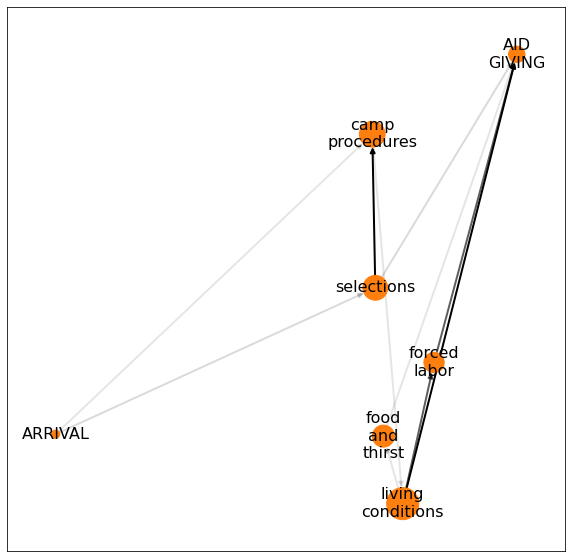

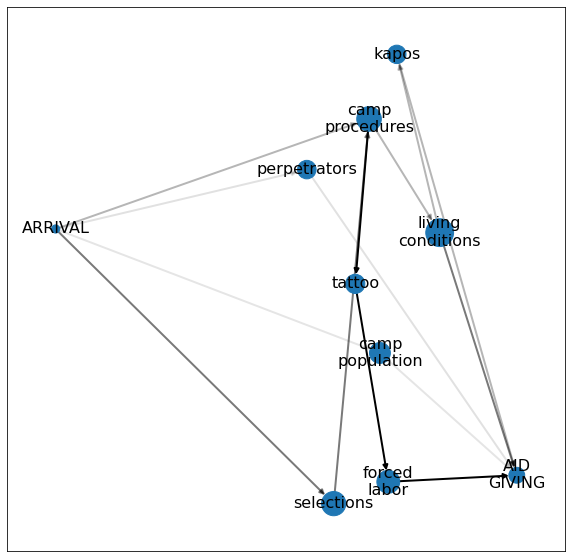

In [27]:
flux = 0.22
story_start = 'arrival'
story_end = 'aid giving'
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None,gender="w")
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None,gender="m")

### Quantitative evidence 2

In [28]:
story_start = 'living conditions'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()

In [29]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

In [30]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

Print the most important pathways for women

In [31]:
print_paths(flux_w,max_length=3)

living conditions-aid giving:9.446506736170493


living conditions-forced labor-aid giving:5.8518039230946535


living conditions-food and thirst-aid giving:4.996228805065206


living conditions-selections-aid giving:4.514777092121417


living conditions-kapos-aid giving:3.9755558912728812


living conditions-camp population-aid giving:3.6440016301961333


living conditions-family-aid giving:3.2473959687828113


living conditions-perpetrators-aid giving:2.8058091190796826


living conditions-mass murder-aid giving:2.77407965928509


living conditions-adaptation methods-aid giving:2.6925042451149404


living conditions-social bonds-aid giving:2.5831902737518333


living conditions-transfer-aid giving:2.3019780464010537


living conditions-departure-aid giving:2.1070319593796736


living conditions-violence-aid giving:1.9862216009239038


living conditions-Appell-aid giving:1.8409546362813616


living conditions-clothing-aid giving:1.7618878548196595


living conditions-contacts-aid givi

Print the most important pathways for men

In [32]:
print_paths(flux_m,max_length=3)

living conditions-aid giving:6.928962529803073


living conditions-forced labor-aid giving:6.596955884332157


living conditions-camp population-aid giving:4.452767521497824


living conditions-kapos-aid giving:4.279656173182307


living conditions-food and thirst-aid giving:3.4438811360609987


living conditions-adaptation methods-aid giving:3.200843234787147


living conditions-selections-aid giving:2.963766187266296


living conditions-mass murder-aid giving:2.6584641018638466


living conditions-departure-aid giving:2.56765823456166


living conditions-camp procedures-aid giving:2.533998125628514


living conditions-family-aid giving:2.3252642877732597


living conditions-transfer-aid giving:2.1478852997564992


living conditions-social bonds-aid giving:2.10504024931855


living conditions-violence-aid giving:1.9274235182030313


living conditions-perpetrators-aid giving:1.8317077682860645


living conditions-contacts-aid giving:1.4203470668754736


living conditions-Appell-aid giv

Print similar pathways

In [33]:
print_similar_paths(flux_w,flux_m)

living conditions-perpetrators-aid giving
Women: 2.8058091190796826
Men: 1.8317077682860645


living conditions-social bonds-aid giving
Women: 2.5831902737518333
Men: 2.10504024931855


living conditions-transfer-aid giving
Women: 2.3019780464010537
Men: 2.1478852997564992


living conditions-aid giving
Women: 9.446506736170493
Men: 6.928962529803073


living conditions-clothing-aid giving
Women: 1.7618878548196595
Men: 1.2011940606190838


living conditions-contacts-aid giving
Women: 1.6514222022219327
Men: 1.4203470668754736


living conditions-kapos-aid giving
Women: 3.9755558912728812
Men: 4.279656173182307


living conditions-departure-aid giving
Women: 2.1070319593796736
Men: 2.56765823456166


living conditions-family-aid giving
Women: 3.2473959687828113
Men: 2.3252642877732597


living conditions-food and thirst-aid giving
Women: 4.996228805065206
Men: 3.4438811360609987


living conditions-selections-aid giving
Women: 4.514777092121417
Men: 2.963766187266296


living condition

### Visualize

4 labels to show
5 labels to show


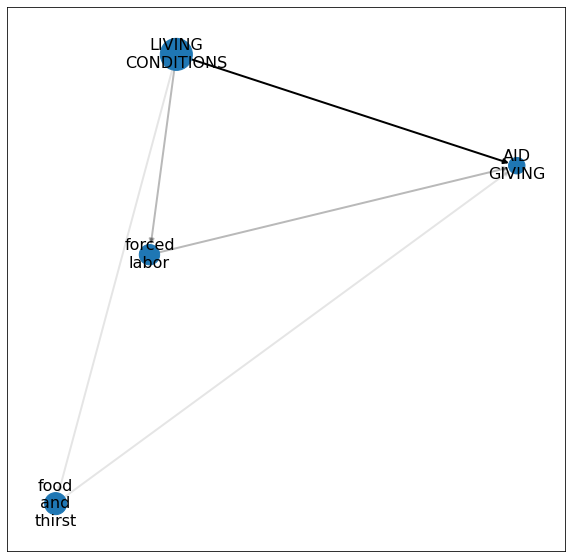

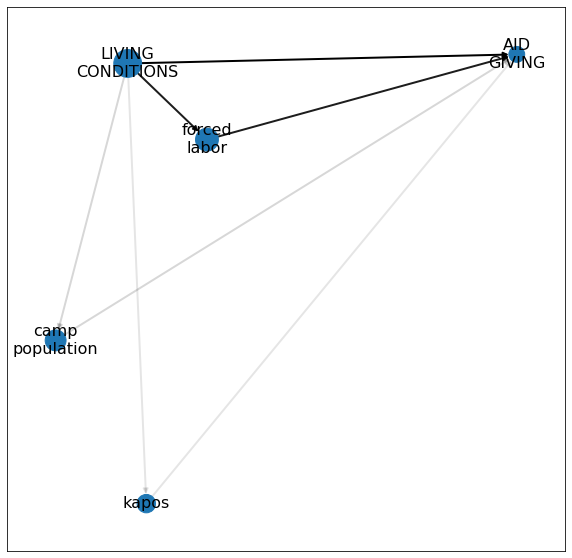

In [34]:
flux=0.2
story_start = 'living conditions'
story_end = 'aid giving'
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [35]:
story_start = 'forced labor'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()

In [36]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.8)

In [37]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.8)

Print most important path for women

In [38]:
print_paths(flux_w,max_length=2)

forced labor-aid giving:12.388684875242385




Print most important path for men

In [39]:
print_paths(flux_m,max_length=2)

forced labor-aid giving:14.927298339751333




### Quantitative evidence 3

Aid giving is more likely to follow forced labor for men than for women.

0
1


/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pw, 'r'+linestyle,label='women',c="#ff7f0e")
/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pm, 'b'+linestyle,label='men', c="#1f77b4")


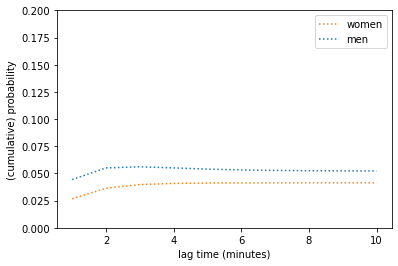

In [40]:
_msmlags = np.arange(1, 11)

#somehow there are topics that are not present in the feature dataframe. exclude those.
_topic_map_forced_labor = features_df[features_df.KeywordLabel.isin(topic_map_forced_labor)].KeywordLabel.tolist()

# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, ['aid giving','food sharing'], _topic_map_forced_labor, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, ['aid giving','food sharing'], _topic_map_forced_labor, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig('Figure_4_solidarity_following_forced_labor.png')

In [41]:
probs_w

array([[0.01145338, 0.02669296],
       [0.01217236, 0.03641412],
       [0.01173032, 0.03974681],
       [0.0111542 , 0.04082859],
       [0.01069684, 0.04117038],
       [0.01038803, 0.04128551],
       [0.0101954 , 0.04133429],
       [0.01008004, 0.04136202],
       [0.01001213, 0.04138033],
       [0.00997217, 0.04139246]])

Aid giving is more likely to follow living conditions for women than for men.

0
1


/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pw, 'r'+linestyle,label='women',c="#ff7f0e")
/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pm, 'b'+linestyle,label='men', c="#1f77b4")


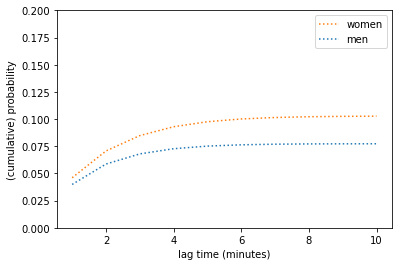

In [42]:
_msmlags = np.arange(1, 11)

#somehow there are topics that are not present in the feature dataframe. exclude those.
_topic_map_living_conditions = features_df[features_df.KeywordLabel.isin(topic_map_living_conditions)].KeywordLabel.tolist()

# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags
                             .shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, ['aid giving','food sharing'], _topic_map_living_conditions, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, ['aid giving','food sharing'], _topic_map_living_conditions, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig('Figure_4_solidarity_following_living_conditions.png')

## Observation 2

### Qualitative description

As above, a key topic that follows the discussion of aid giving is forced labour. However, this has different weight in the narratives of men and women. Men are more likely to discuss forced labour following aid giving. By contrast, women are more likely to discuss housing and living conditions.

The traffic going through the following two paths are different for men and women.

aid giving-forced labor <br/>
Women: 5.892215934536441 <br/>
Men: 9.179672557709363<br/>

aid giving-living conditions <br/>
Women: 4.989195032183169 <br/>
Men: 3.940806972832768 <br/>




### Quantitative evidence 1

In [43]:
story_start = 'aid giving'
story_end = 'departure'
flux = 1

In [44]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [45]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where forced labor follow aid giving for women

In [46]:
result = []

for path in flux_w:
    if len(path.split('aid giving-forced labor-'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

aid giving-forced labor-departure
2.847593704481043


aid giving-forced labor-camp population-selections-adaptation methods-transfer-departure
0.9575532297236321


aid giving-forced labor-perpetrators-camp procedures-living conditions-liberation-departure
0.47114105716883375


aid giving-forced labor-food and thirst-family-selections-camp procedures-kapos-mass murder-corpses-departure
0.015928736636936155


aid giving-forced labor-food and thirst-family-camp procedures-kapos-mass murder-suicides-transfer-bystanders-departure
0.004408919395623303




Print the total amount of traffic going through these nodes

In [47]:
print (np.array(result).sum())

4.296625647406068


Print those paths where forced labor follow aid giving for men

In [48]:
result = []

for path in flux_m:
    if len(path.split('aid giving-forced labor-'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

aid giving-forced labor-departure
3.27183589871641


aid giving-forced labor-perpetrators-camp procedures-departure
1.4121818673103503


aid giving-forced labor-food and thirst-adaptation methods-departure
1.2977391539478285


aid giving-forced labor-camp population-selections-camp procedures-clothing-departure
1.1307943721768035


aid giving-forced labor-food acquisition-violence-medical care-perpetrators-living conditions-suicides-departure
0.14161035993891866




Print the total amount of traffic going through these nodes

In [49]:
print (np.array(result).sum())

7.254161652090311


Print those paths where living conditions follow aid giving for women

In [50]:
result = []

for path in flux_w:
    if len(path.split('aid giving-living conditions-'))>1 or len(path.split('aid giving-housing conditions-'))>1:
        result.append(flux_w[path])
        print (path)
        print (flux_w[path])
        print ('\n')
print (np.array(result).sum())

aid giving-living conditions-selections-departure
6.007621628738812


aid giving-living conditions-kapos-transfer-departure
1.0323080721117712


aid giving-living conditions-Appell-food and thirst-selections-separations-departure
0.6174402580345643


7.657369958885147


Print the total amount of traffic going through these nodes

In [51]:
print (np.array(result).sum())

7.657369958885147


Print those paths where living conditions follow aid giving for men

In [52]:
result = []

for path in flux_m:
    if len(path.split('aid giving-living conditions-'))>1 or len(path.split('aid giving-housing conditions-'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')

aid giving-living conditions-food and thirst-departure
4.095492132466641


aid giving-living conditions-transfer-departure
2.0145677507284834


aid giving-living conditions-psychological reactions-camp procedures-tattoo-killings-survival explanations-departure
0.5176850519424395


aid giving-living conditions-survival explanations-departure
0.17345834614127603




Print the total amount of traffic going through these nodes

In [53]:
print (np.array(result).sum())

6.80120328127884


### Visualization

7 labels to show
10 labels to show


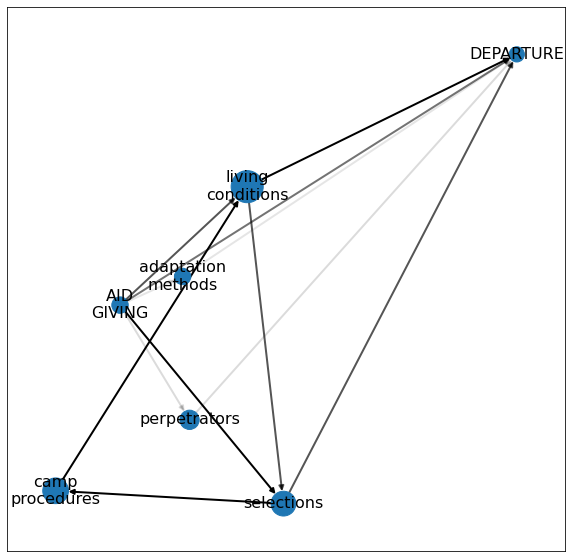

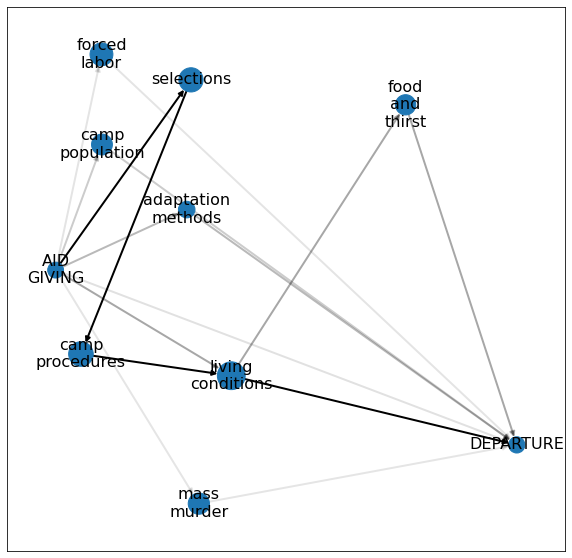

In [54]:
flux = 0.25
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [55]:
story_start = 'aid giving'
story_end = 'living conditions'

In [56]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

Print the amount of traffic going between them for women and men

In [57]:
print_similar_paths(flux_w,flux_m,max_length=2)

aid giving-living conditions
Women: 9.873733791667279
Men: 8.966650230386985




In [58]:
story_start = 'aid giving'
story_end = 'forced labor'
state_index = features_df.KeywordLabel.to_list()

In [59]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [60]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

Print the amount of traffic going between them for women and men

In [61]:
print_similar_paths(flux_w,flux_m,max_length=3)

aid giving-violence-forced labor
Women: 2.278784949682364
Men: 2.351996296791765


aid giving-mass murder-forced labor
Women: 2.572686476386159
Men: 3.190696151145693


aid giving-camp population-forced labor
Women: 3.0287055220582566
Men: 3.5650248089955987


aid giving-kapos-forced labor
Women: 2.4579788190722107
Men: 3.1130463200822307


aid giving-forced labor
Women: 7.4109314439760405
Men: 11.024349937583883




### Quantitative evidence 3

0
1


/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pw, 'r'+linestyle,label='women',c="#ff7f0e")
/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pm, 'b'+linestyle,label='men', c="#1f77b4")


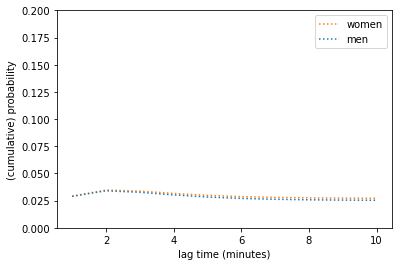

In [62]:
_msmlags = np.arange(1, 11)

#somehow there are topics that are not present in the feature dataframe. exclude those.
#_topic_map_forced_labor = features_df[features_df.KeywordLabel.isin(topic_map_forced_labor)].KeywordLabel.tolist()

# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, ['forced labor'], ['aid giving'],
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, ['forced labor'], ['aid giving'], 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

0
1


/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pw, 'r'+linestyle,label='women',c="#ff7f0e")
/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pm, 'b'+linestyle,label='men', c="#1f77b4")


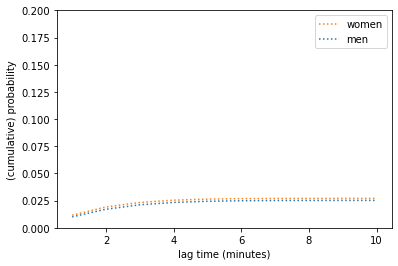

In [63]:
_msmlags = np.arange(1, 11)

#somehow there are topics that are not present in the feature dataframe. exclude those.
#_topic_map_forced_labor = features_df[features_df.KeywordLabel.isin(topic_map_forced_labor)].KeywordLabel.tolist()

# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, ['living conditions'], ['aid giving'],
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, ['living conditions'], ['aid giving'], 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 3

### Qualitative description

Similarly to aid giving, women are more likely to discuss food sharing following living conditions, whereas men discuss it following forced labour. 

The total amount of traffic going through the following two paths for women is 11,8 % and for men it is 8.8%:

living conditions-food-food sharing

living conditions-food sharing

At the same time, the total traffic going through the following paths is different for men (18.3%) and women 15.2):

forced labor-food sharing

forced labor-food-food sharing


### Quantitative evidence 1

story_start = 'arrival'
story_end = 'food sharing'
flux = 1

flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where living and housing conditions prime food sharing for women

result = []

for path in flux_w:
    if len(path.split('-living conditions-food sharing'))>1 or len(path.split('-housing conditions-food sharing'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where living and housing conditions prime food sharing for men

result = []

for path in flux_m:
    if len(path.split('-living conditions-food sharing'))>1 or len(path.split('-housing conditions-food sharing'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where forced labor prime food sharing for women

result = []

for path in flux_w:
    if len(path.split('-forced labor-food sharing'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where forced labor prime food sharing for men

result = []

for path in flux_m:
    if len(path.split('-forced labor-food sharing'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

### Visualization

flux = 0.2
story_start = 'arrival'
story_end = 'food sharing'
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

story_start = 'forced labor'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

print_similar_paths(flux_w,flux_m,max_length=3)

story_start = 'living conditions'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

print_similar_paths(flux_w,flux_m,max_length=3)

### Quantitative evdience 3

Food sharing is more likely to follow forced labor for men than for women.

_msmlags = np.arange(1, 11)

topic_1 = ["food sharing"]
topic_2  = topic_map_forced_labor
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

Food sharing is more likely to follow camp living conditions for women than for men.

_msmlags = np.arange(1, 11)

topic_1 = ["food sharing"]
topic_2  = topic_map_living_conditions
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 4

### Qualitative description

In testimonies of men and women, both living conditions and forced labour are discussed following food sharing. There is no difference in terms of the amount of the traffic that goes from food sharing to forced labour.

food sharing-forced labor <br/>
Women: 5.60066015579362  <br/>
Men: 5.661811177443069  <br/>

However, in case of men more traffic is going from food sharing towards living conditions:

food sharing-living conditions <br/>
Women: 4.612779648936039  <br/>
Men: 5.4796159931673705  <br/>

### Quantitative evidence 1

story_start = 'food sharing'
story_end = 'departure'
flux = 1

flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where forced labor follow food sharing for women

result = []

for path in flux_w:
    next_state = path.split('-')[1]
    if next_state =='forced labor':
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where forced labor follow food sharing for men

result = []

for path in flux_m:
    next_state = path.split('-')[1]
    if next_state in topic_map_forced_labor:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where living conditions follow food sharing for women

result = []

for path in flux_w:
    next_state = path.split('-')[1]
    if next_state =='living conditions':
        result.append(flux_w[path])
        print (path)

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where living conditions follow food sharing for men

result = []

for path in flux_m:
    next_state = path.split('-')[1]
    if next_state =="living conditions":
        result.append(flux_m[path])
        print (path)

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

### Visualization

flux = 0.19
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

story_start = 'food sharing'
story_end = 'forced labor'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

print_similar_paths(flux_w,flux_m,max_length=2)

story_start = 'food sharing'
story_end = 'living conditions'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

print_similar_paths(flux_w,flux_m,max_length=3)

## Observation 5 A

### Qualitative description

Women tend to discuss social bonds following living environment, whereas men tend to discuss it following forced labour. Different amount of traffic is going through the following paths in case of women (5.3 %) and men (4.3 %):

living conditions-social relations

Different amount of traffic is going through the following paths in case of women (4.6 %) and men (8.6 %):

forced labor-social relations

Finally, food is an key transitionary topic between social relations and living environment for women:

living conditions-food-social relations <br/>
Women: 6.434011448725096<br/>
Men: 3.5924098744045265<br/>

Similarly, food is an key transitionary topic between forced labour and living environment for women:

forced labor-food-social relations<br/>
Women: 5.672980573742698<br/>
Men: 3.5486202551343533<br/>

## Quantitative evidence 1

In [64]:
story_start = 'arrival'
story_end = 'social bonds'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where forced labor prime social relations for women

In [65]:
result = []

for path in flux_w:
    if len(path.split('-forced labor-social bonds'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-camp procedures-living conditions-forced labor-social bonds
3.8675416748392935




Print the total amount of traffic going through these nodes

In [66]:
print (np.array(result).sum())

3.8675416748392935


Print those paths where forced labor prime social relations for men

In [67]:
result = []

for path in flux_m:
    if len(path.split('-forced labor-social bonds'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

arrival-selections-camp procedures-tattoo-forced labor-social bonds
7.101243775602309




Print the total amount of traffic going through these nodes

In [68]:
print (np.array(result).sum())

7.101243775602309


Print those paths where living conditions prime social relations for women

In [69]:
result = []

for path in flux_w:
    if len(path.split('living conditions-social bonds'))>1:
        result.append(flux_w[path])
        print (path)
        print (flux_w[path])
        print ('\n')

arrival-selections-camp procedures-living conditions-social bonds
14.60516978079809




Print the total amount of traffic going through these nodes

In [70]:
print (np.array(result).sum())

14.60516978079809


Print those paths where living conditions prime social relations for men

In [71]:
result = []

for path in flux_m:
    if len(path.split('living conditions-social bonds'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')

arrival-selections-camp procedures-living conditions-social bonds
9.770878350134936




Print the total amount of traffic going through these nodes

In [72]:
print (np.array(result).sum())

9.770878350134936


### Quantitative evidence 2

In [73]:
story_start = 'living conditions'
story_end = 'social bonds'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

In [74]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

In [75]:
print_similar_paths(flux_w,flux_m,max_length=4)

living conditions-camp population-social bonds
Women: 3.4388179908290253
Men: 4.249475534912532


living conditions-selections-social bonds
Women: 2.0991117296472446
Men: 1.5987433356718093


living conditions-perpetrators-social bonds
Women: 2.5117005300059945
Men: 1.734683109457535


living conditions-transfer-social bonds
Women: 2.068263738184948
Men: 1.9584138611545323


living conditions-family-social bonds
Women: 2.456981639414073
Men: 2.2986314771032257


living conditions-mass murder-social bonds
Women: 3.621045837439575
Men: 3.387775012391074


living conditions-selections-camp procedures-social bonds
Women: 4.000300464555756
Men: 3.7523231237292047


living conditions-Appell-social bonds
Women: 2.5086272716627
Men: 2.3816376897603586


living conditions-kapos-social bonds
Women: 4.83742397981956
Men: 4.406084593570738


living conditions-adaptation methods-social bonds
Women: 2.400913003074201
Men: 2.9247277954106146


living conditions-forced labor-social bonds
Women: 3.8709

### Visualize

10 labels to show
13 labels to show


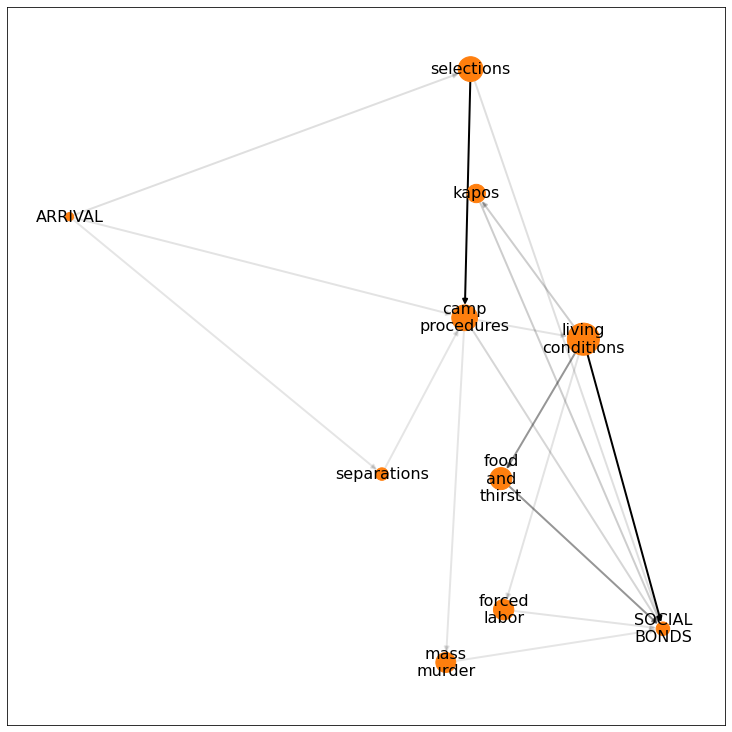

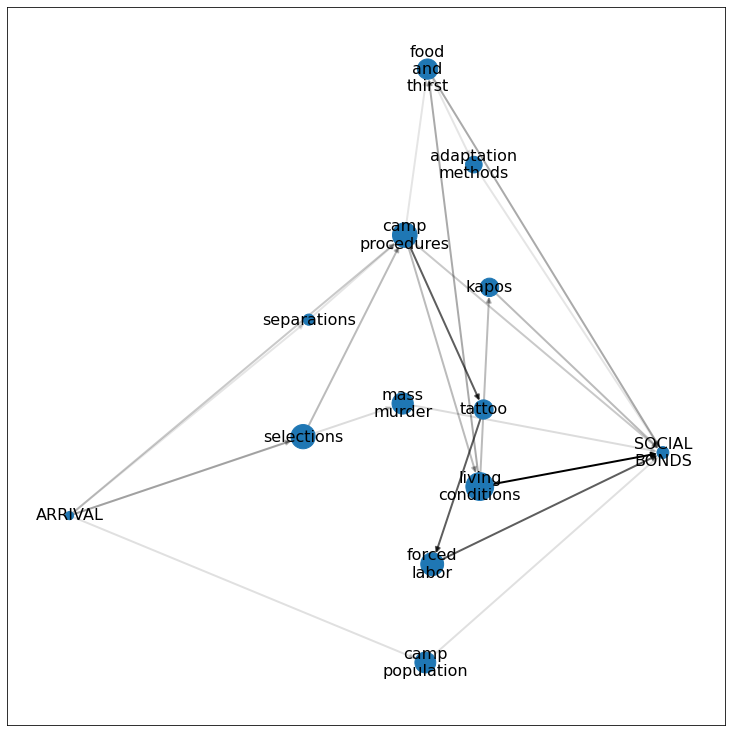

In [76]:
flux = 0.4
from markov_modelling.markov_utils import *
story_start = 'arrival'
story_end = 'social bonds'
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None,gender="w")
plt.tight_layout(pad=0.1)

plt.savefig("figure_5_w.png")
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None,gender="m")
plt.tight_layout(pad=0.1)
plt.savefig("figure_5_m.png")

In [77]:
story_start = 'forced labor'
story_end = 'social bonds'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

In [78]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

In [79]:
print_similar_paths(flux_w,flux_m,max_length=3)

forced labor-food and thirst-social bonds
Women: 6.45331318308642
Men: 4.874205149515768


forced labor-social bonds
Women: 5.708958452280475
Men: 9.21293307123764


forced labor-kapos-social bonds
Women: 3.9008214365107916
Men: 4.358396337842484


forced labor-living conditions-social bonds
Women: 8.05304991937314
Men: 6.31797606061318


forced labor-camp population-social bonds
Women: 4.456909017701001
Men: 5.695020310827641




### Visualization

4 labels to show
4 labels to show


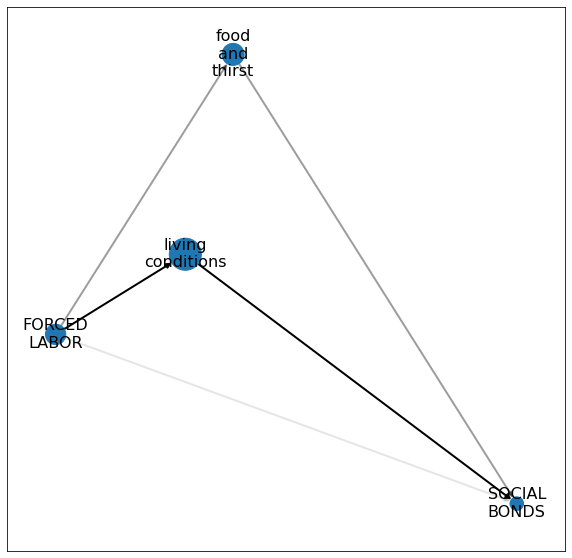

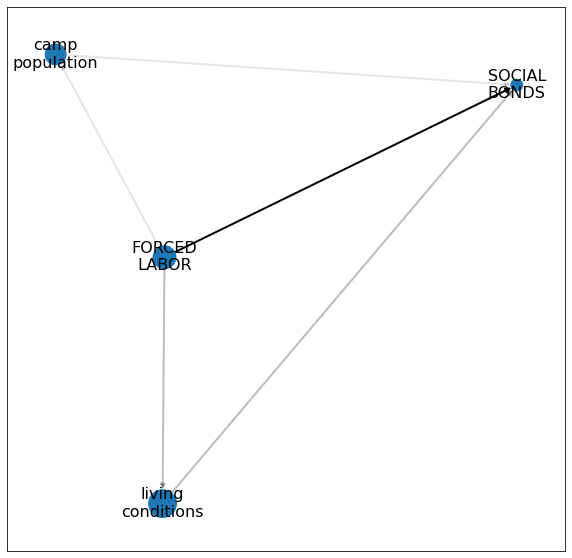

In [80]:
flux = 0.16
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evdience 3

Social relations are more likely to follow forced labor for men than for women.

0
1


/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pw, 'r'+linestyle,label='women',c="#ff7f0e")
/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pm, 'b'+linestyle,label='men', c="#1f77b4")


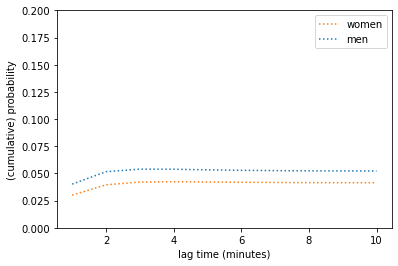

In [81]:
_msmlags = np.arange(1, 11)

topic_1 = ["social bonds"]
topic_2  = ['forced labor']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

Social relations are more likely to follow camp living conditions for women than for men.

0
1


/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pw, 'r'+linestyle,label='women',c="#ff7f0e")
/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pm, 'b'+linestyle,label='men', c="#1f77b4")


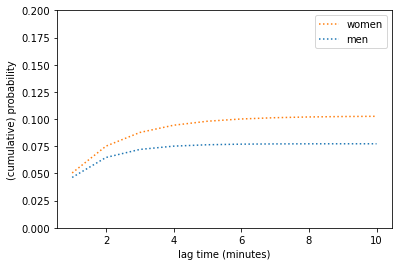

In [82]:
_msmlags = np.arange(1, 11)

topic_1 = ["social bonds"]
topic_2  = ["living conditions"]
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 5

### Qualitative description

In narratives of both women and men, the discussion of friendship tends to be preceded by the discussion of living environments and forced labor. For women,  the discussion of friendship followng living environment is stronger:

living conditions-friends <br/>
Women: 7.186269105921992 <br/>
Men: 4.987467244255548 <br/>

An important transitionary topic between living conditions and friends is food:

living conditions-food-friends <br/>
Women: 3.7173273244734077 <br/>
Men: 2.806933358478007 <br/>

But this is stronger for women.

Another important transitionary topic between them is camp adaptation methods, which is stronger for men:

living conditions-camp adaptation methods-friends <br/>
Women: 2.8453985144436293 <br/>
Men: 3.213141994177019 <br/>

For women and men, the traffic between forced labor and friends is equal:

forced labor-friends <br/>
Women: 5.134709271710951 <br/>
Men: 4.946899219077014 <br/>

But the probability of transition from forced labor to friends is higher for men.

### Quantitative evidence 1

story_start = 'arrival'
story_end = 'friends'
flux = 0.2
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

flux_w

flux_m

Print those paths where forced labor prime friends for women

result = []

for path in flux_w:
    if len(path.split('-forced labor-friends'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where forced labor prime aid giving for men

result = []

for path in flux_m:
    if len(path.split('-forced labor-friends'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])


Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where living conditions prime friends for women

result = []

for path in flux_w:
    if len(path.split('living conditions-friends'))>1:
        result.append(flux_w[path])
        print (path)
        print (flux_w[path])
        print ('\n')

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where forced labor prime aid giving for men

result = []

for path in flux_m:
    if len(path.split('living conditions-friends'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

### Visualize

flux = 0.2
story_start = 'arrival'
story_end = 'friends'
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 1

story_start = 'living conditions'
story_end = 'friends'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

print_similar_paths(flux_w,flux_m)

### Visualize it

flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

story_start = 'forced labor'
story_end = 'friends'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

story_start = 'living conditions'
story_end = 'friends'
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

print_similar_paths(flux_w,flux_m)

### Quantitative evdience 3

Friends are more likely to follow forced labor for men than for women.

_msmlags = np.arange(1, 11)

topic_1 = ["friends","social relations"]
topic_2  = topic_map_forced_labor
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig("figure_4_social_bonds_following_forced_labor.png")

Friends are more likely to follow camp living conditions for women than for men.

_msmlags = np.arange(1, 11)

topic_1 = ["friends","social relations"]
topic_2  = topic_map_living_conditions
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig("figure_4_social_bonds_following_living_conditions.png")

## Observation 6

### Qualitative description

Women are more likely to discuss living conditions following friendship than man do. Similarly women are more likely to discuss forced laboru followng friendship:

friends-living conditions <br/>
Women: 3.535931711450818 <br/>
Men: 2.198317704062195 <br/>

For women food is an important transitionary topic:

friends-food-living conditions:3.5758882151694316


Similarly, women are much more likely to follow with forced labour after friendship:

friends-forced labor <br/>
Women: 7.431426222661657 <br/>
Men: 2.6768092638626446 <br/>

Aid giving is a more important transitionary topic between friends and forced labor:

friends-aid giving-forced labor <br/>
Women: 1.5338897117404788 <br/>
Men: 0.36132920515314015 <br/>

For women food is an important transitionary topic between friends and forced labor.

friends-food-forced labor:3.557599215626483 <br/>




## Quantitative evidence 1

story_start = 'friends'
story_end = 'departure'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Print those paths where forced labor follow friends for women

result = []

for path in flux_w:
    if len(path.split('friends-forced labor-'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where forced labor follow friends for men

result = []

for path in flux_m:
    if len(path.split('friends-forced labor-'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where living conditions follow friends for women

result = []

for path in flux_w:
    if len(path.split('friends-living conditions-'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where living conditions follow friends for women

result = []

for path in flux_m:
    if len(path.split('friends-living conditions-'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

### Visualize

story_start = 'friends'
story_end = 'departure'

flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

story_start = 'friends'
story_end = 'living conditions'
state_index = features_df.KeywordLabel.to_list()

flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

Print the most important pathways for women

print_paths(flux_w,max_length=3)

Print the most important pathways for men

print_paths(flux_m,max_length=3)

Print similar pathways

print_similar_paths(flux_w,flux_m)

story_start = 'friends'
story_end = 'forced labor'
state_index = features_df.KeywordLabel.to_list()

flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

Print the most important pathways for women

print_paths(flux_w,max_length=3)

Print the most important pathways for men

print_paths(flux_m,max_length=3)

print_similar_paths(flux_w,flux_m)

### Quantitative evdience 3

_msmlags = np.arange(1, 11)

topic_2 = ["friends"]
topic_1  = topic_map_forced_labor
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

_msmlags = np.arange(1, 11)

topic_2 = ["friends"]
topic_1  = topic_map_living_conditions
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 7

## Qualitative description

If we look at all possible narrative pathways that can connect arrival to and departure from Birkenau, we can see that a significant amount of traffic is going through aid giving  and social bonds. Their significance can be understood if they are compared to Appel. The amount of traffic going through friendship  and food sharing is less significant. 

In case of women, more traffic is going through these nodes, with an exception of aid giving:

•    social bonds: 3.47 %

•    aid giving: 2.46 %

•    friendship: 0.85 $

•    food sharing: 0.35 %

In case of men, less traffic is going through these nodes:

•.	 social bonds: 2.46 %

•    aid giving: 2.6 %

•    friendship: 0.24 %

•    food sharing: 0.29 %

#### Total traffic going through them in the complete dataset (men and women):

In [83]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_complete = calculate_flux(data_set_1_complete,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_complete_dataset_2 = calculate_flux(data_set_2_complete,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Calculate the total traffic going through social bonds

In [84]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []
total_escapes = []

In [85]:
for i,element in enumerate(flux_complete):
    if 'social bonds' in element.split('-'):
        total_social_bonds.append(flux_complete[element])
print(np.array(total_social_bonds).sum())

3.060516586729032


Calculate the total traffic going through aid giving

In [86]:
for i,element in enumerate(flux_complete):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_complete[element])
print(np.array(total_aid_giving).sum())

5.386469237202458


Calculate the total traffic going through Appell

In [87]:
for i,element in enumerate(flux_complete):
    if 'Appell' in element.split('-'):
        total_appell.append(flux_complete[element])
print(np.array(total_appell).sum())

10.54741010897348


Calculate the total traffic going through escape

In [88]:
for i,element in enumerate(flux_complete):
    if 'escapes' in element.split('-'):
        total_escapes.append(flux_complete[element])
print(np.array(total_escapes).sum())

0.6640500533973936


Calculate the total traffic going through friendship

for i,element in enumerate(flux_complete):
    if 'friends' in element.split('-'):
        total_friends.append(flux_complete[element])
print(np.array(total_friends).sum())

Calculate the total traffic going through food sharing

for i,element in enumerate(flux_complete):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_complete[element])
print(np.array(total_food_sharing).sum())

#### Total traffic going through them in the dataset of women

In [89]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_w_dataset_2 = calculate_flux(data_set_2_w,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


In [90]:
len(flux_w)

191

In [91]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []

Calculate the total traffic going through social bonds

In [92]:
for i,element in enumerate(flux_w):
    if 'social bonds' in element.split('-'):
        total_social_bonds.append(flux_w[element])
print(np.array(total_social_bonds).sum())

3.8256598765203833


Calculate the total traffic going through aid giving

In [93]:
for i,element in enumerate(flux_w):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_w[element])
print(np.array(total_aid_giving).sum())

6.216545592715214


Calculate the total traffic going through friendship

for i,element in enumerate(flux_w):
    if 'friends' in element.split('-'):
        total_friends.append(flux_w[element])
print(np.array(total_friends).sum())

Calculate the total traffic going through food sharing

for i,element in enumerate(flux_w):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_w[element])
        #print (element)
        #print (flux_w[element])
print(np.array(total_food_sharing).sum())

#### Total traffic going through them in the dataset of men

In [94]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_m_dataset_2 = calculate_flux(data_set_2_m,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


In [95]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []



Calculate the total traffic going through social bonds

In [96]:
for i,element in enumerate(flux_m):
    if 'social bonds' in element.split('-'):
        total_social_bonds.append(flux_m[element])
print(np.array(total_social_bonds).sum())

1.3989528529074522


Calculate the total traffic going through aid giving

In [97]:
for i,element in enumerate(flux_m):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_m[element])
print(np.array(total_aid_giving).sum())

4.118340061409598


Calculate the total traffic going through friendship

for i,element in enumerate(flux_m):
    if 'friends' in element.split('-'):
        total_friends.append(flux_m[element])
print(np.array(total_friends).sum())

Calculate the total traffic going through food sharing

total_food_sharing = []

for i,element in enumerate(flux_m):
    if 'food sharing' in element.split('-'):
        #print (element)
        #print (flux_m[element])
        total_food_sharing.append(flux_m[element])
print(np.array(total_food_sharing).sum())

## Observation 8

### Qualitative Description

In testimonies of women there are important narrative pathways that lead to the discussion of survival explanations and involve social bonds (friends and social relations) as states preceding survival explanations; in testimonies of men such paths have significantly less traffic (the ratio is more than 3 times for women)

At the same time, in testimonies of men, between aid giving and survival explanation there is slightly more traffic (ratio is 1.6 times).

The study of direct link has similar results:

aid giving-survival explanations <br/>
Women: 2.6696661754080866 <br/>
Men: 3.8067494674128137 <br/>

But in case of women social relations and friends are important transitionary topics:

aid giving-social relations-survival explanations:1.3752851611513381 <br/>
aid giving-friends-survival explanations:0.8100798985654745 <br/>

The amount of direct traffic between social relations and survival explanations is much larger for women:

social relations-survival explanations <br/>
Women: 3.3426904751901763 <br/>
Men: 0.6392835020909489 <br/>


With friends, there is slightly more traffic in case of men:

friends-survival explanations <br/>
Women: 1.9655525123995026 <br/>
Men: 2.17582398231009 <br/>



### Quantitative evidence 1

In [98]:
story_start = 'arrival'
story_end = 'survival explanations'

In [99]:
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Find social bonds preceding survivor explanation in women narratives

In [100]:
result = []
for path in flux_w:
    if len(path.split('-social bonds-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])
        print ('\n')
print (np.array(result).sum())

arrival-camp procedures-living conditions-social bonds-survival explanations
3.4207642634232727


3.4207642634232727


Print the total amount of traffic going through these nodes

In [101]:
print (np.array(result).sum())

3.4207642634232727


Find aid giving in women narratives

In [102]:
result = []
for path in flux_w:
    if len(path.split('-aid giving-survival explanations'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])
        print ('\n')
print (np.array(result).sum())

arrival-separations-camp procedures-living conditions-forced labor-aid giving-survival explanations
2.5402108654977478


2.5402108654977478


Print the total amount of traffic going through these nodes

In [103]:
print (np.array(result).sum())

2.5402108654977478


Find social bonds preceding survivor explanation in men narratives

In [104]:
result = []
for path in flux_m:
    if len(path.split('-social bonds-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-perpetrators-camp procedures-living conditions-social bonds-survival explanations
1.0367629883910978


arrival-military-post-conflict activity-living conditions-forced labor-violence-social bonds-survival explanations
0.042195646265584176


1.078958634656682


Print the total amount of traffic going through these nodes

In [105]:
print (np.array(result).sum())

1.078958634656682


Find aid giving preceding survivor explanation in women narratives

In [106]:
result = []
for path in flux_m:
    if len(path.split('-aid giving-survival explanations'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-perpetrators-camp procedures-tattoo-forced labor-aid giving-survival explanations
3.9163808601893546


3.9163808601893546


Print the total amount of traffic going through these nodes

In [107]:
print (np.array(result).sum())

3.9163808601893546


### Quantitative evidence 2

In [108]:
story_start = 'aid giving'
story_end = 'survival explanations'
state_index = features_df.KeywordLabel.to_list()

In [109]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

In [110]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

In [111]:
print_paths(flux_w,max_length=3)

aid giving-family-survival explanations:4.277064612865986


aid giving-perpetrators-survival explanations:3.8533689860791824


aid giving-forced labor-survival explanations:3.6416370612080153


aid giving-adaptation methods-survival explanations:3.02857266774095


aid giving-survival explanations:3.0051635586296275


aid giving-contacts-survival explanations:2.173766117304532


aid giving-psychological reactions-survival explanations:1.9444579253321135


aid giving-medical care-survival explanations:1.9135132937039334


aid giving-diseases-survival explanations:1.3925121286602036


aid giving-mass murder-survival explanations:1.2330302019815382


aid giving-awareness-survival explanations:1.0259305239588596


aid giving-children-survival explanations:0.8090477850058357


aid giving-religion-survival explanations:0.7899316120552228


aid giving-hiding and evasion-survival explanations:0.7587032702031914


aid giving-preferential treatment-survival explanations:0.6486699443761756


aid g

In [112]:
print_paths(flux_m,max_length=3)

aid giving-survival explanations:4.951941947423354


aid giving-camp population-survival explanations:3.5653235803013064


aid giving-forced labor-survival explanations:3.411205428158835


aid giving-kapos-survival explanations:3.0652114370571413


aid giving-family-survival explanations:2.042874057024986


aid giving-loved ones' fates-survival explanations:1.7286205260796703


aid giving-killings-survival explanations:1.541313489013335


aid giving-religion-survival explanations:1.1306820113335863


aid giving-hiding and evasion-survival explanations:0.9965096759311042


aid giving-diseases-survival explanations:0.9183091472739754


aid giving-resistance-survival explanations:0.5473093032590791


aid giving-warnings-survival explanations:0.3280846221996412




In [113]:
print_similar_paths(flux_w,flux_m)

aid giving-survival explanations
Women: 3.0051635586296275
Men: 4.951941947423354


aid giving-forced labor-survival explanations
Women: 3.6416370612080153
Men: 3.411205428158835


aid giving-selections-camp procedures-living conditions-survival explanations
Women: 6.314628592479902
Men: 5.854074123168448


aid giving-religion-survival explanations
Women: 0.7899316120552228
Men: 1.1306820113335863


aid giving-hiding and evasion-survival explanations
Women: 0.7587032702031914
Men: 0.9965096759311042


aid giving-diseases-survival explanations
Women: 1.3925121286602036
Men: 0.9183091472739754


aid giving-family-survival explanations
Women: 4.277064612865986
Men: 2.042874057024986




In [114]:
story_start = 'social bonds'
story_end = 'survival explanations'
state_index = features_df.KeywordLabel.to_list()
flux = 0.3

In [115]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [116]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [117]:
print_paths(flux_w)

social bonds-living conditions-survival explanations:6.286842544839473


social bonds-selections-survival explanations:5.304735532121684


social bonds-survival explanations:4.332266034335467


social bonds-food and thirst-selections-camp procedures-mass murder-survival explanations:3.8960316792013994


social bonds-forced labor-perpetrators-survival explanations:3.8155372556204004


social bonds-family-survival explanations:3.645363273552225


social bonds-camp population-selections-camp procedures-living conditions-forced labor-survival explanations:3.6275691498949625




In [118]:
print_paths(flux_m)

social bonds-living conditions-survival explanations:5.88650669824874


social bonds-camp population-survival explanations:5.496030910364509


social bonds-selections-camp procedures-living conditions-food and thirst-survival explanations:5.042544305755434


social bonds-aid giving-selections-survival explanations:4.865393558691442


social bonds-tattoo-survival explanations:4.351007567614293


social bonds-food and thirst-selections-camp procedures-living conditions-departure-survival explanations:4.038607585652152


social bonds-adaptation methods-departure-transfer-survival explanations:3.8728253893754543




In [119]:
print_similar_paths(flux_w,flux_m)

social bonds-living conditions-survival explanations
Women: 6.286842544839473
Men: 5.88650669824874




story_start = 'friends'
story_end = 'survival explanations'
state_index = features_df.KeywordLabel.to_list()

flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

print_paths(flux_w,max_length=3)

print_paths(flux_m,max_length=3)

print_similar_paths(flux_w,flux_m)

## Visualize


Notice that social bonds are "missing" from the plot showing men

7 labels to show
8 labels to show


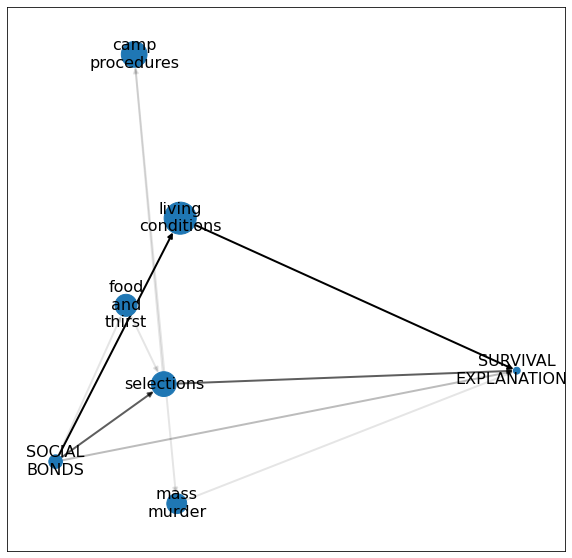

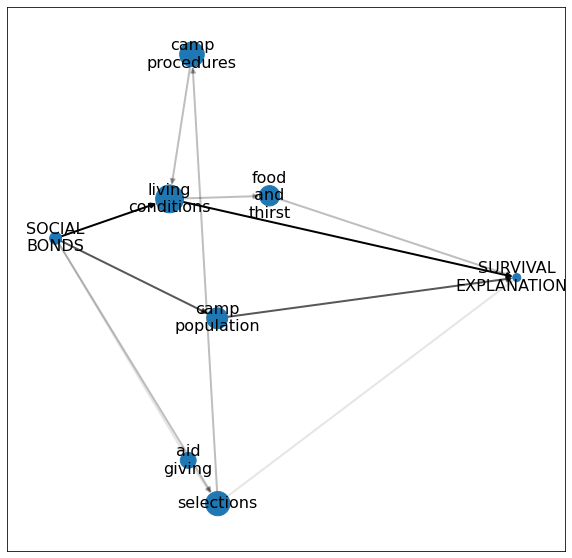

In [120]:
story_start = 'social bonds'
story_end = 'survival explanations'
flux = 0.17
res=visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evdience 3

The probability that survival explanations follow friends and social relations is higher for women.

0
1


/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pw, 'r'+linestyle,label='women',c="#ff7f0e")
/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pm, 'b'+linestyle,label='men', c="#1f77b4")


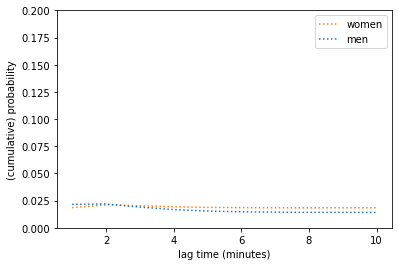

In [121]:
_msmlags = np.arange(1, 11)

topic_1 = ["social bonds","friends"]
topic_2  = ['survival explanations','survival']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig('Figure_4_social_relations_friends_following_survival_explanations.png')

0
1


/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pw, 'r'+linestyle,label='women',c="#ff7f0e")
/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pm, 'b'+linestyle,label='men', c="#1f77b4")


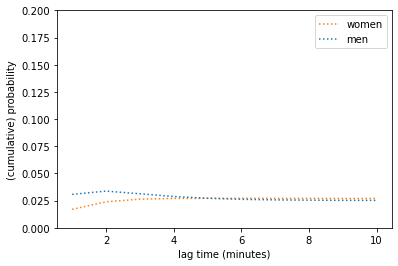

In [122]:
_msmlags = np.arange(1, 11)

topic_1 = ["aid giving","food sharing"]
topic_2  = ['survival explanations','survival']
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig('Figure_4_aid_giving_food sharing_following_survival_explanations.png')

## Observation 9

### Qualitative description

The moment when one particularly needed the help of others was the selection, when the ill and those who were unable to work were selected to be sent to gas chambers. In testimonies we can often read that victims helped each other in these moments (for instance by hiding or holding the ill); yet victims attribute their survival of selections to the help of their peers and friends. This narrative frame corresponds to the following narrative pathways:
- selections-social relations-survival explanations <br/>
- selections-friends-survival explanations <br/>
- selections-aid giving-survival explanations <br/>

These narrative pathways are more significant in testimonies of women than men.

In case of women:

selections-aid giving-survival explanations:1.372566897382252 <br/>
selections-social relations-survival explanations:0.8517907825853956 <br/>
selections-friends-survival explanations:0.4084233290441179 <br/>

In case of men:

selections-aid giving-survival explanations:0.9130792244020753 <br/>
selections-friends-survival explanations: 0.22597524390714183 <br/>
no path with social relations <br/>


Men and women are equally likely to connect selection with survival explanations:

selections-survival explanations <br/>
Women: 5.995184312276154 <br/>
Men: 5.573167275281716 <br/>

Similarly, another moment when one needed the help of others was the Appel, again women discuss Appel survivor explanations with friends and social relations as transitionary topics:

Appell-social relations-survival explanations:1.2750393765030372 <br/>
Appell-friends-survival explanations:0.35100749020630817 <br/>


### Quantitative evidence 1

In [123]:
story_start = 'selections'
story_end = 'survival explanations'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [124]:
print_paths(flux_w,max_length=4)

selections-camp procedures-living conditions-survival explanations:6.334995190521259


selections-survival explanations:5.757719093296445


selections-perpetrators-survival explanations:4.430801178651296


selections-mass murder-survival explanations:4.212039151950565


selections-family-survival explanations:3.7571221176255976


selections-adaptation methods-survival explanations:3.034721913208484


selections-contacts-survival explanations:2.918309241405887


selections-camp population-survival explanations:2.398991845666135


selections-living conditions-food and thirst-survival explanations:2.339909518926375


selections-camp procedures-tattoo-survival explanations:2.305245352749596


selections-departure-survival explanations:2.2597306536673467


selections-aid giving-survival explanations:1.9261226763215658


selections-transfer-survival explanations:1.8833935322180848


selections-social bonds-survival explanations:1.1829420106581898


selections-psychological reactions-survival

In [125]:
print_paths(flux_m,max_length=3)

selections-survival explanations:5.426522901358832


selections-perpetrators-survival explanations:3.8247783142266862


selections-camp population-survival explanations:3.116368058177515


selections-family-survival explanations:3.098382991097097


selections-loved ones' fates-survival explanations:3.037901941676261


selections-transfer-survival explanations:2.9832265538673743


selections-departure-survival explanations:2.6021009474243377


selections-mass murder-survival explanations:1.7848559290370891


selections-aid giving-survival explanations:1.3204062142417419


selections-psychological reactions-survival explanations:1.138374752022254


selections-hiding and evasion-survival explanations:1.085993213837976


selections-killings-survival explanations:1.0789447721638572


selections-adaptation methods-survival explanations:0.9333464495734631


selections-deceptions-survival explanations:0.9197699333953944


selections-medical care-survival explanations:0.813490178600239


select

In [126]:
print_similar_paths(flux_w,flux_m)

selections-loved ones' fates-survival explanations
Women: 0.5708127173084646
Men: 3.037901941676261


selections-deceptions-survival explanations
Women: 0.6559657322237272
Men: 0.9197699333953944


selections-adaptation methods-survival explanations
Women: 3.034721913208484
Men: 0.9333464495734631


selections-violence-survival explanations
Women: 1.026923578445131
Men: 0.40135348518939884


selections-aid giving-survival explanations
Women: 1.9261226763215658
Men: 1.3204062142417419


selections-survival explanations
Women: 5.757719093296445
Men: 5.426522901358832


selections-psychological reactions-survival explanations
Women: 1.1664680448592384
Men: 1.138374752022254


selections-killings-survival explanations
Women: 0.5043104896527234
Men: 1.0789447721638572


selections-religion-survival explanations
Women: 0.4993642969818498
Men: 0.5398964465742652


selections-contacts-survival explanations
Women: 2.918309241405887
Men: 0.7104973796068419


selections-departure-survival explana

In [127]:
story_start = 'Appell'
story_end = 'survival explanations'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [128]:
print_paths(flux_w,max_length=4)

Appell-living conditions-survival explanations:6.340111942941776


Appell-food and thirst-selections-survival explanations:5.334453105729708


Appell-mass murder-survival explanations:4.202627561086063


Appell-living conditions-forced labor-survival explanations:3.6470982984608162


Appell-perpetrators-survival explanations:3.4317011595662668


Appell-survival explanations:3.3770239289770183


Appell-kapos-survival explanations:3.09243854984645


Appell-family-survival explanations:3.0638476151503484


Appell-adaptation methods-survival explanations:2.7872809055719574


Appell-forced labor-aid giving-survival explanations:2.42052249656615


Appell-camp population-survival explanations:2.412246318382835


Appell-food and thirst-survival explanations:2.369812289367083


Appell-selections-departure-survival explanations:2.2503797704590354


Appell-food and thirst-family-survival explanations:1.9321100430156066


Appell-forced labor-perpetrators-survival explanations:1.884197643134541


A

In [129]:
print_paths(flux_m,max_length=3)

Appell-living conditions-survival explanations:5.902099367345115


Appell-food and thirst-survival explanations:5.106169163783687


Appell-camp population-survival explanations:4.522479190881672


Appell-departure-survival explanations:4.069287976033252


Appell-forced labor-survival explanations:3.429663150991218


Appell-kapos-survival explanations:3.098840594264488


Appell-family-survival explanations:3.0959940461397255


Appell-killings-survival explanations:2.3657695729295733


Appell-psychological reactions-survival explanations:2.334982688651215


Appell-survival explanations:1.3390505119331675


Appell-diseases-survival explanations:1.2867068605276386


Appell-religion-survival explanations:1.1428495006638875




In [130]:
print_similar_paths(flux_w,flux_m)

Appell-family-survival explanations
Women: 3.0638476151503484
Men: 3.0959940461397255


Appell-survival explanations
Women: 3.3770239289770183
Men: 1.3390505119331675


Appell-psychological reactions-survival explanations
Women: 1.0647654217660454
Men: 2.334982688651215


Appell-food and thirst-survival explanations
Women: 2.369812289367083
Men: 5.106169163783687


Appell-diseases-survival explanations
Women: 1.0083752096847658
Men: 1.2867068605276386


Appell-living conditions-survival explanations
Women: 6.340111942941776
Men: 5.902099367345115


Appell-camp population-survival explanations
Women: 2.412246318382835
Men: 4.522479190881672


Appell-food and thirst-selections-survival explanations
Women: 5.334453105729708
Men: 4.862611739890145


Appell-kapos-survival explanations
Women: 3.09243854984645
Men: 3.098840594264488


Appell-killings-survival explanations
Women: 0.6185997029034926
Men: 2.3657695729295733




### Visualization

6 labels to show
7 labels to show


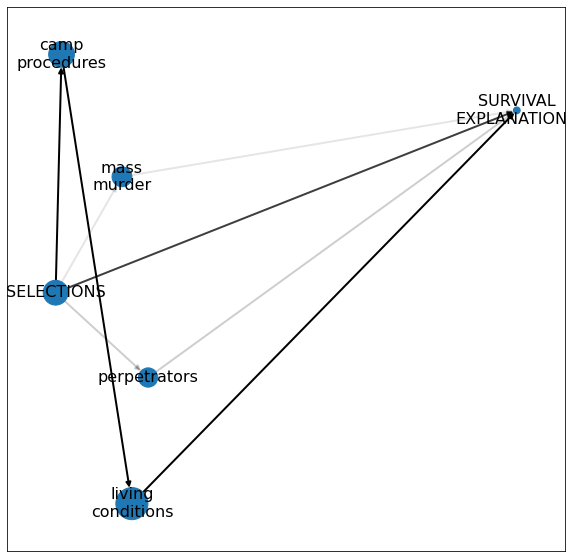

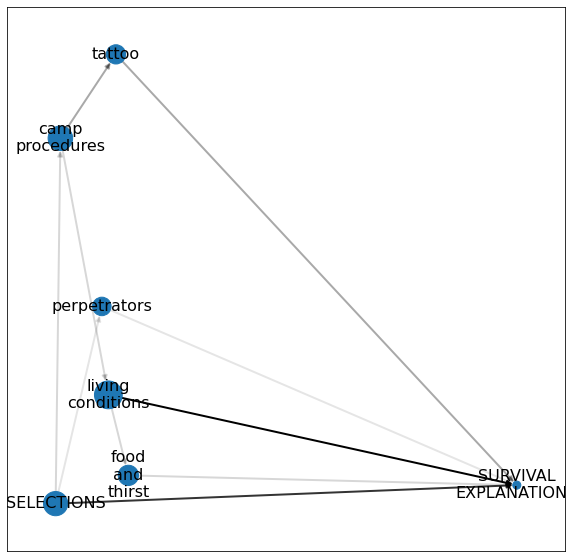

In [131]:
flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,['selections'],story_end,None)
res=visualize_most_important_paths(data_set_1_m,flux,features_df,['selections'],story_end,None)

## Observation 10

### Qualitative description

Social relations and aid giving are closely connected in narratives of both men and women; (slightly more connected for men). For women, the most important transitionary topic is living conditions and selection, for men it is forced labor.

social relations-forced labor-aid giving <br/>
Women: 2.8948768437334533 <br/>
Men: 6.7009466811388885 <br/>


social relations-living conditions-aid giving <br/>
Women: 3.2443759794384 <br/>
Men: 1.9733942618306775 <br/>


### Quantitative evidence

In [132]:
flux = 1
story_start = 'social bonds'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [133]:
print_paths(flux_w,max_length=3)

social bonds-living conditions-aid giving:7.296927757771854


social bonds-aid giving:6.245501795647142


social bonds-forced labor-aid giving:5.10383470892812


social bonds-camp population-aid giving:4.274643496833974


social bonds-family-aid giving:3.6544524143920953


social bonds-adaptation methods-aid giving:3.2712493775246796


social bonds-kapos-aid giving:3.2267017053702376


social bonds-perpetrators-aid giving:3.1655760160483366


social bonds-departure-aid giving:2.9262962813393676


social bonds-transfer-aid giving:2.737601408604202


social bonds-mass murder-aid giving:2.7023520841183997


social bonds-camp procedures-aid giving:2.6597548947904546


social bonds-physical condition-aid giving:1.4274975195670447


social bonds-violence-aid giving:1.3482811677860447


social bonds-psychological reactions-aid giving:1.234514340457212


social bonds-medical care-aid giving:1.100622159054907


social bonds-children-aid giving:1.0756700310976084


social bonds-punishments-aid g

In [134]:
print_paths(flux_m,max_length=3)

social bonds-aid giving:9.178883953678742


social bonds-forced labor-aid giving:6.299529344210393


social bonds-camp population-aid giving:5.544854085977936


social bonds-living conditions-aid giving:5.024818237888371


social bonds-kapos-aid giving:4.035770390267067


social bonds-adaptation methods-aid giving:3.870701474459243


social bonds-selections-aid giving:2.8468593137753904


social bonds-mass murder-aid giving:2.530281832815578


social bonds-family-aid giving:1.8231960767187363


social bonds-killings-aid giving:1.7167100999734428


social bonds-medical care-aid giving:1.2604328751269298


social bonds-psychological reactions-aid giving:1.0336102827577482


social bonds-covert activities-aid giving:1.0211667498682986


social bonds-deaths-aid giving:0.8454075037852906


social bonds-barter-aid giving:0.743363260596843


social bonds-diseases-aid giving:0.5487030657559159


social bonds-physical condition-aid giving:0.5101767083078179


social bonds-cultural activities-ai

In [135]:
print_similar_paths(flux_w,flux_m)

social bonds-psychological reactions-aid giving
Women: 1.234514340457212
Men: 1.0336102827577482


social bonds-killings-aid giving
Women: 0.582825626914081
Men: 1.7167100999734428


social bonds-adaptation methods-aid giving
Women: 3.2712493775246796
Men: 3.870701474459243


social bonds-living conditions-aid giving
Women: 7.296927757771854
Men: 5.024818237888371


social bonds-aid giving
Women: 6.245501795647142
Men: 9.178883953678742


social bonds-kapos-aid giving
Women: 3.2267017053702376
Men: 4.035770390267067


social bonds-mass murder-aid giving
Women: 2.7023520841183997
Men: 2.530281832815578


social bonds-medical care-aid giving
Women: 1.100622159054907
Men: 1.2604328751269298


social bonds-cultural activities-aid giving
Women: 0.32554780725877447
Men: 0.47514477115264153


social bonds-camp population-aid giving
Women: 4.274643496833974
Men: 5.544854085977936


social bonds-diseases-aid giving
Women: 0.9414746523286682
Men: 0.5487030657559159


social bonds-forced labor-ai

### Visualize

7 labels to show
4 labels to show


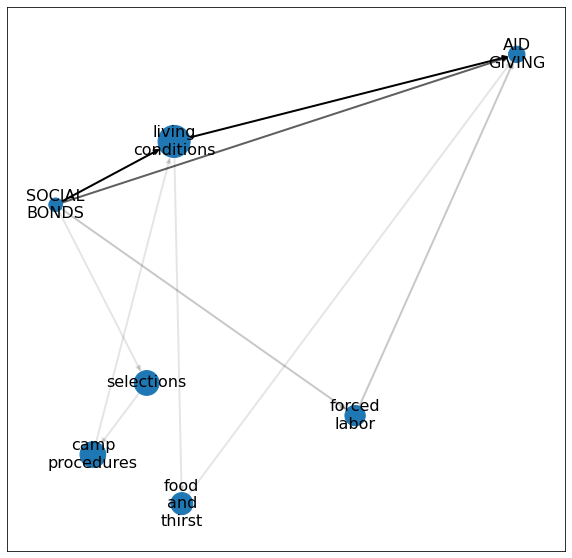

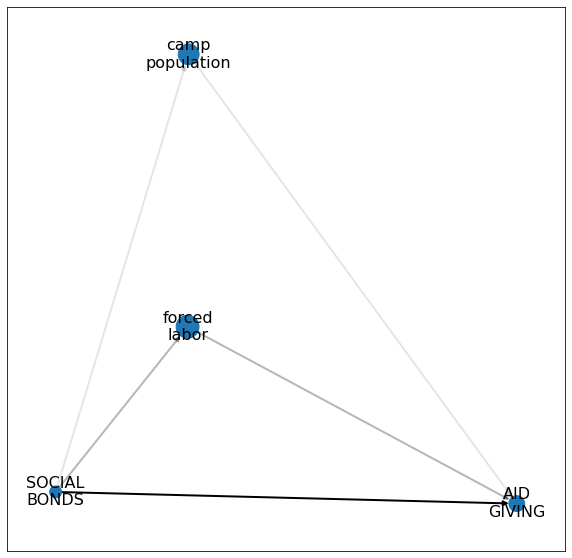

In [136]:
story_start = ['social bonds']
story_end = ['aid giving']
res = visualize_most_important_paths(data_set_1_w,0.2,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m,0.2,features_df,story_start,story_end,None)

## Observation 11

### Qualitative description

Friendship and aid giving are closely connected in narratives of women and they are not closely connected in narratives of men.

friends-selections-aid giving
Women: 5.427121616259672
Men: 0.11639422393786059


friends-aid giving
Women: 1.9789089838040406
Men: 0.4285773765946193


### Quantitative evidence

flux = 1
story_start = 'friends'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

print_paths(flux_w,max_length=3)

print_paths(flux_m,max_length=3)

print_similar_paths(flux_w,flux_m,max_length=3)

### Visualize

flux = 0.15
story_start = ['friends']
story_end = ['aid giving']
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

The probability that aid giving follow friends and social relations is higher for women.

_msmlags = np.arange(1, 11)

topic_1 = ["friends","social relations"]
topic_2= ['aid giving']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 13

### Qualitative description

In narratives of those men and women who did not work, friendship and survival explanations are more connected for women

### Quantitative evidencw

flux = 0.6
story_start = 'friends'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



print_similar_paths(flux_w,flux_m)


story_start = ['friends']
story_end = ['survival explanations']
flux = 0.2
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

The probability that aid giving follow friends and social relations is higher for women.

_msmlags = np.arange(1, 11)

topic_1 = ["friends","social relations"]
topic_2= ['survival explanations']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 14 A

### Qualitative description

In narratives of those men and women who did not work, social relations and living conditions are much more connected for women:

living conditions - social relations

For women 9.9% of total traffic is going through this path, whereas for men, it is 5.8%.

The following transitionary topics are present both in testimonies of women and men but with different weights:

living conditions-aid giving-social relations <br/>
Women: 1.3274897627391509 <br/>
Men: 0.6744181635044657 <br/>

living conditions-friends-social relations <br/>
Women: 0.8305450841970277 <br/>
Men: 0.522043120093434 <br/>

living conditions-Blockälteste-social relations <br/>
Women: 1.151697967923542 <br/>
Men: 0.751131993867747 <br/>

living conditions-hunger-social relations <br/>
Women: 0.3749064709578037 <br/>
Men: 1.02338128352873 <br/>

### Quantitative evidence

In [137]:
flux = 0.6
story_start = 'living conditions'
story_end = 'social bonds'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [138]:
print_similar_paths(flux_w,flux_m)

living conditions-camp population-social bonds
Women: 3.3345273687364183
Men: 3.605717840349133


living conditions-perpetrators-social bonds
Women: 2.5318301888090193
Men: 1.850452377708643


living conditions-family-social bonds
Women: 2.9205874488221895
Men: 2.669666875984415


living conditions-mass murder-social bonds
Women: 3.3912241866542754
Men: 2.4989477295623126


living conditions-aid giving-social bonds
Women: 2.0553393272805973
Men: 1.6422591634940176


living conditions-selections-camp procedures-social bonds
Women: 5.0319930763648095
Men: 4.713428587598405


living conditions-Appell-social bonds
Women: 3.3096451627066203
Men: 2.3282726230709287


living conditions-kapos-social bonds
Women: 4.428598084212077
Men: 4.117216059453586


living conditions-adaptation methods-social bonds
Women: 2.3829635186599054
Men: 3.598385529834629


living conditions-food and thirst-social bonds
Women: 8.522498012417108
Men: 8.87539390268818


living conditions-social bonds
Women: 18.61383

3 labels to show
3 labels to show


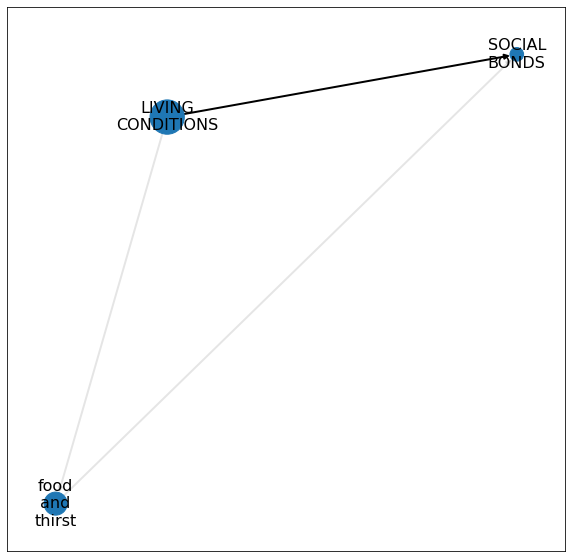

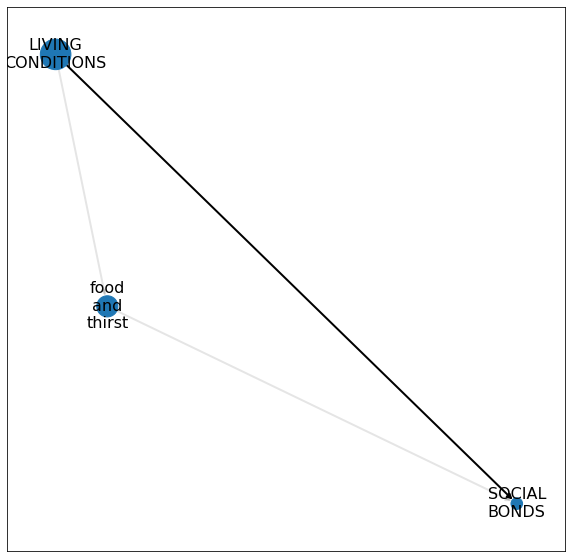

In [139]:

story_start = ['living conditions']
story_end = ['social bonds']
flux = 0.2
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

The probability that friends and social relations follow living conditions is higher for women who did not work.

0
1


/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pw, 'r'+linestyle,label='women',c="#ff7f0e")
/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pm, 'b'+linestyle,label='men', c="#1f77b4")


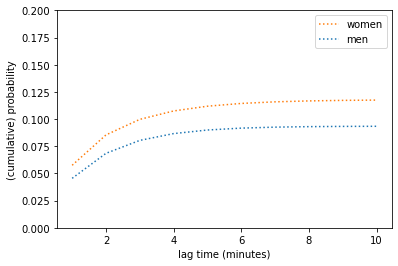

In [140]:
_msmlags = np.arange(1, 11)

topic_2 = ["friends","social bonds"]
topic_1= ['living conditions']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 14

### Qualitative description

In narratives of those men and women who did not work, friendship and living conditions are much more connected for women:

friends-living conditions

For women 6.7% of total traffic is going through this path, whereas for men, it is 1.5%.

In case of women, the main transitionary topics include:


friends-aid giving-living conditions:1.1352997404787295

friends-Blockälteste-living conditions:0.9866599269050341

friends-food-living conditions:2.8081658495238724


### Quantitative evidence

flux = 1
story_start = 'friends'
story_end = 'living conditions'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

print_paths(flux_w,max_length=3)

print_paths(flux_m,max_length=3)

print_similar_paths(flux_w,flux_m)


story_start = ['friends']
story_end = ['living conditions']
flux = 0.2
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3


_msmlags = np.arange(1, 11)

topic_1 = topic_map_living_conditions
topic_2= ['friends']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 14 B

### Qualitative description

In narratives of those men and women who did not work, aid giving and living conditions are much more connected for women:

living conditions - aid giving

For women 7.4% of total traffic is going through this path, whereas for men, it is 3.36%.

### Quantitative evidence

In [141]:
flux = 0.3
story_start = 'living conditions'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [142]:
print_similar_paths(flux_w,flux_m)

living conditions-kapos-aid giving
Women: 4.002931314034952
Men: 3.356745262559271


living conditions-aid giving
Women: 12.44797214954615
Men: 10.21179801173119


living conditions-food and thirst-aid giving
Women: 5.7655741931722755
Men: 4.072166864459164




### Visualization

5 labels to show
6 labels to show


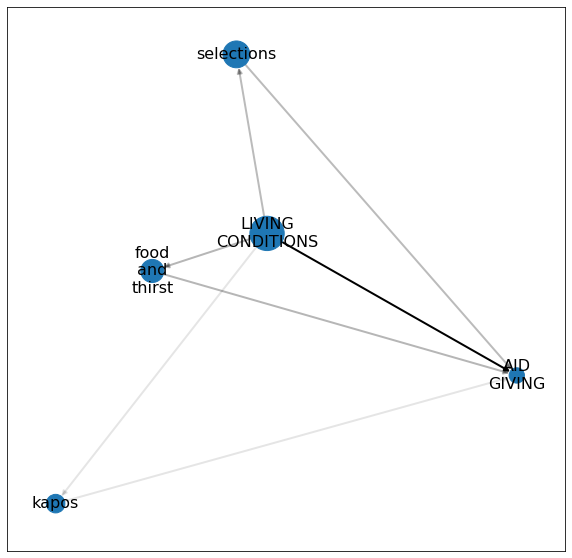

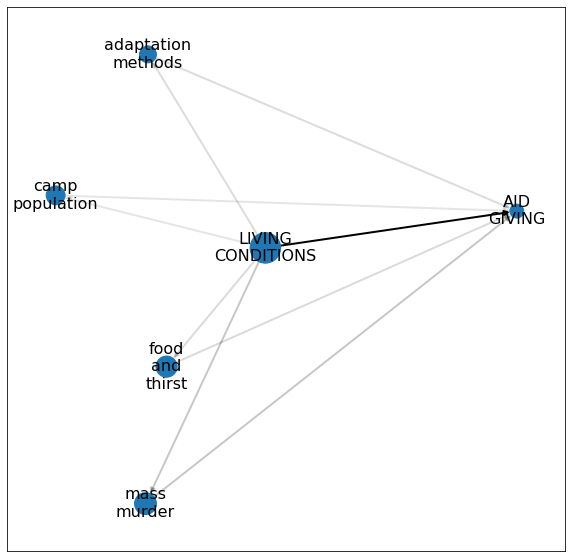

In [143]:
story_start = ['living conditions']
story_end = ['aid giving']
flux = 0.25
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

The probability that aid giving follows living condiions is higher for women.

0
1


/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pw, 'r'+linestyle,label='women',c="#ff7f0e")
/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pm, 'b'+linestyle,label='men', c="#1f77b4")


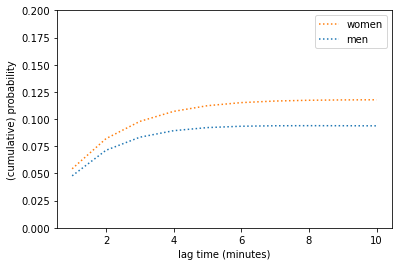

In [144]:




_msmlags = np.arange(1, 11)

topic_1 = topic_map_living_conditions
topic_2= ['aid giving']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 15

### Qualitative description

In narratives of those men and women who did not work, aid giving and survival explanations are much more connected for women:

aid giving-survival explanations


For women 1.8% of total traffic is going through this path, whereas for men, it is 0.7753%.

### Quantitative evidence

In [145]:
flux = 0.8
story_start = 'aid giving'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [146]:
print_similar_paths(flux_w,flux_m)

aid giving-family-survival explanations
Women: 4.7884815183925795
Men: 2.7853503671521502


aid giving-camp procedures-living conditions-kapos-survival explanations
Women: 3.1656089694570335
Men: 4.907888371968311




### Visualize it

6 labels to show
7 labels to show


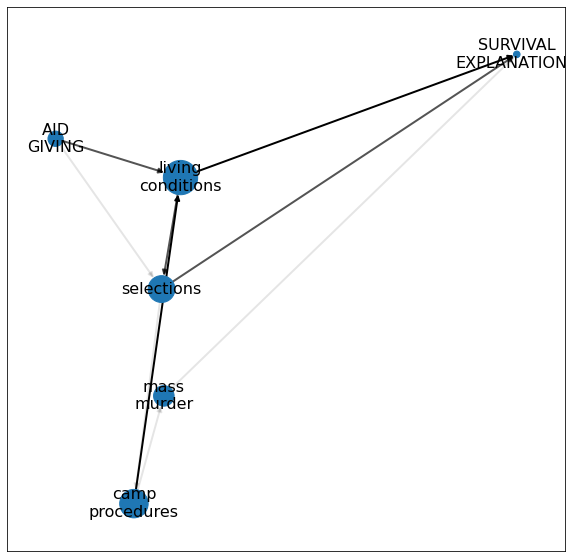

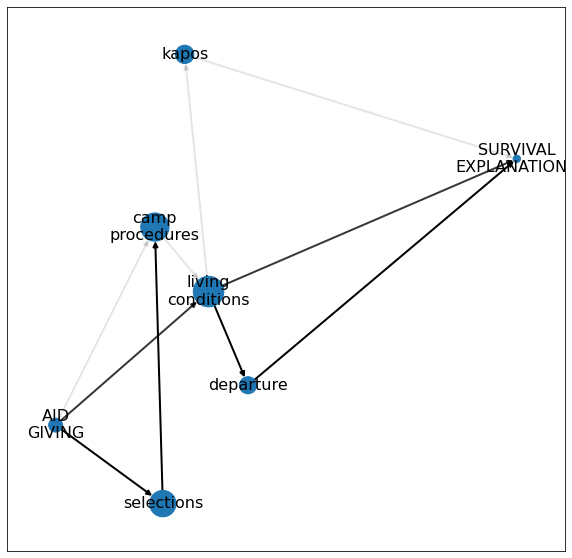

In [147]:
story_start = ['aid giving']
story_end = ['survival explanations']
flux = 0.15
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

0
1


/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pw, 'r'+linestyle,label='women',c="#ff7f0e")
/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pm, 'b'+linestyle,label='men', c="#1f77b4")


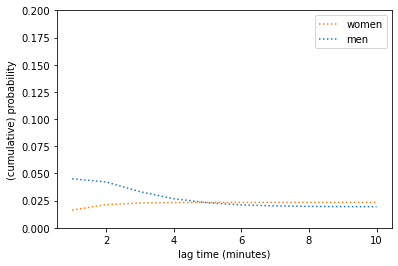

In [148]:




_msmlags = np.arange(1, 11)

topic_2 = ['survival explanations']
topic_1= ['aid giving']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 16

### Qualitative description

In narratives of those men and women who worked, aid giving and survival explanations are  more connected for men:

aid giving-survival explanations


For women 2.6% of total traffic is going through this path, whereas for men, it is 3.39%.

But in case of women, there are a number of short non-directs paths:

aid giving-social relations-survival explanations:1.5957266441234774

aid giving-diseases-survival explanations: 1.2137559365334227

aid giving-friends-survival explanations:0.8478423026431587

aid giving-food-survival explanations:2.105173850686586




### Quantitative evidence

In [149]:
flux = 1
story_start = 'aid giving'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [150]:
print_paths(flux_w,max_length=3)

aid giving-forced labor-survival explanations:7.982359097481801


aid giving-survival explanations:3.6925675280157626


aid giving-family-survival explanations:3.572308577425711


aid giving-perpetrators-survival explanations:3.131767760787818


aid giving-adaptation methods-survival explanations:2.7734372774295233


aid giving-medical care-survival explanations:2.4044753282261033


aid giving-social bonds-survival explanations:2.308288732636535


aid giving-kapos-survival explanations:2.281847904001033


aid giving-food and thirst-survival explanations:2.1858428656961264


aid giving-contacts-survival explanations:2.0109548735136347


aid giving-departure-survival explanations:1.9068453106249426


aid giving-camp population-survival explanations:1.6680090084032133


aid giving-transfer-survival explanations:1.6339961672854142


aid giving-awareness-survival explanations:1.5206771266729957


aid giving-diseases-survival explanations:1.488629005036245


aid giving-liberation-survival ex

In [151]:
print_paths(flux_m,max_length=3)

aid giving-survival explanations:8.555788589179269


aid giving-forced labor-survival explanations:5.734632132928597


aid giving-living conditions-survival explanations:5.143597365892466


aid giving-selections-survival explanations:4.892402140540164


aid giving-camp population-survival explanations:4.501156462965222


aid giving-perpetrators-survival explanations:2.481719436954599


aid giving-kapos-survival explanations:2.413517257553946


aid giving-mass murder-survival explanations:2.343377441197214


aid giving-medical care-survival explanations:2.1650369683953463


aid giving-killings-survival explanations:1.8452393399817104


aid giving-family-survival explanations:1.7568524003081278


aid giving-punishments-survival explanations:1.5402568911577108


aid giving-loved ones' fates-survival explanations:1.295897257096202


aid giving-resistance-survival explanations:0.9649069608466743


aid giving-psychological reactions-survival explanations:0.9432679298922241


aid giving-prefe

In [152]:
print_similar_paths(flux_w,flux_m)

aid giving-survival explanations
Women: 3.6925675280157626
Men: 8.555788589179269


aid giving-camp population-survival explanations
Women: 1.6680090084032133
Men: 4.501156462965222


aid giving-perpetrators-survival explanations
Women: 3.131767760787818
Men: 2.481719436954599


aid giving-forced labor-survival explanations
Women: 7.982359097481801
Men: 5.734632132928597


aid giving-psychological reactions-survival explanations
Women: 0.5615906497717342
Men: 0.9432679298922241


aid giving-medical care-survival explanations
Women: 2.4044753282261033
Men: 2.1650369683953463


aid giving-mass murder-survival explanations
Women: 0.00035503665429072634
Men: 2.343377441197214


aid giving-killings-survival explanations
Women: 0.7738306643630551
Men: 1.8452393399817104


aid giving-kapos-survival explanations
Women: 2.281847904001033
Men: 2.413517257553946


aid giving-family-survival explanations
Women: 3.572308577425711
Men: 1.7568524003081278


aid giving-preferential treatment-survival 

### Visualize

9 labels to show
7 labels to show


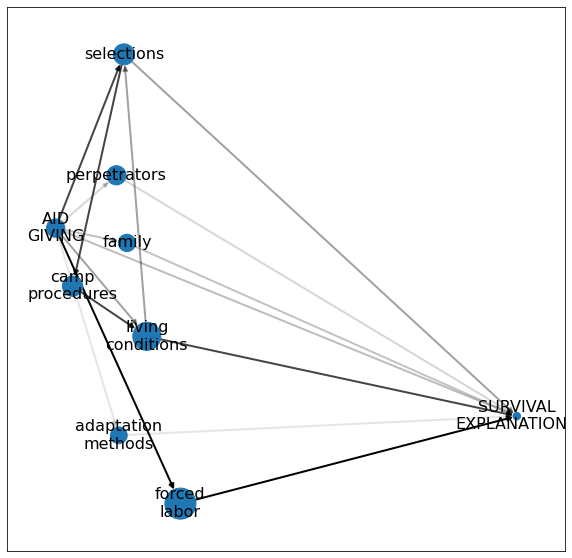

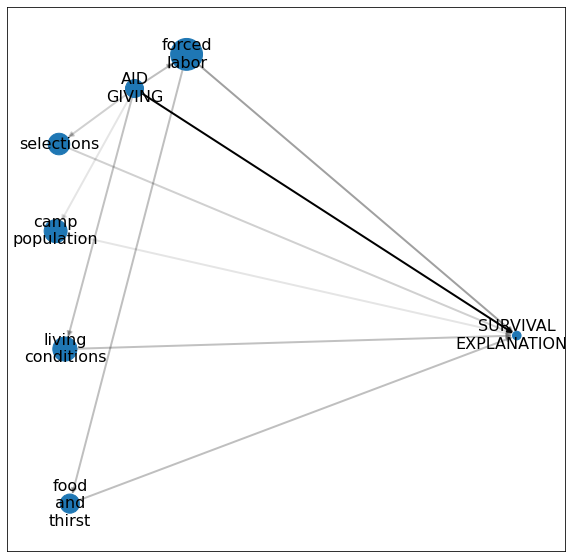

In [153]:

story_start = ['aid giving']
story_end = ['survival explanations']
flux = 0.3
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

The probability that aid giving follows survival explanations is higher for men.

0
1


/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pw, 'r'+linestyle,label='women',c="#ff7f0e")
/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pm, 'b'+linestyle,label='men', c="#1f77b4")


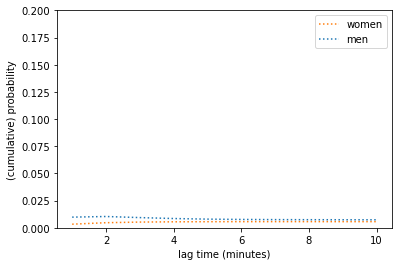

In [154]:




_msmlags = np.arange(1, 11)

topic_1 = ['survival explanations']
topic_2= ['aid giving']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 17

### Qualitative descriptions

In narratives of those men and women who worked, social relations and survival explanations are  more connected for women:

social relations-survival explanations


For women 4.7% of total traffic is going through the path above;  for men 2.5% is going through this path.

A key path with transitory topic for men includes:

social relations-aid giving-survival explanations
2.50368892717799

Key paths with transitory topics for women includes:

social relations-living conditions-survival explanations:2.9110184744683765

social relations-preferential treatment-survival explanations:0.8644349360585929


social relations-friends-survival explanations:0.7264439886153188


### Quantitative evidence

In [155]:
flux = 1
story_start = 'social bonds'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [156]:
print_paths(flux_w,max_length=3)

social bonds-forced labor-survival explanations:7.944608775786783


social bonds-living conditions-survival explanations:6.638812123164751


social bonds-selections-survival explanations:5.592944480304871


social bonds-survival explanations:4.792164475259407


social bonds-adaptation methods-survival explanations:2.751991540315762


social bonds-psychological reactions-survival explanations:2.5905844080013645


social bonds-contacts-survival explanations:2.2016389323655137


social bonds-camp population-survival explanations:2.1256013884111833


social bonds-testimony sharing-survival explanations:0.28299566255146347




In [157]:
print_paths(flux_m,max_length=3)

social bonds-aid giving-survival explanations:7.1287360804404205


social bonds-tattoo-survival explanations:4.722351673712217


social bonds-killings-survival explanations:2.573785013863713


social bonds-awareness-survival explanations:1.2700155934835307


social bonds-medical care-survival explanations:0.3378112580721652




In [158]:
print_similar_paths(flux_w,flux_m)

social bonds-food and thirst-family-survival explanations
Women: 3.3480098686672926
Men: 3.36454786727317




### Visualize

5 labels to show
7 labels to show


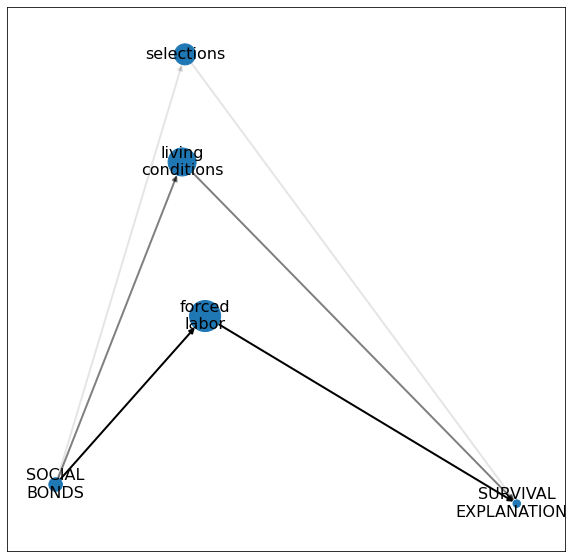

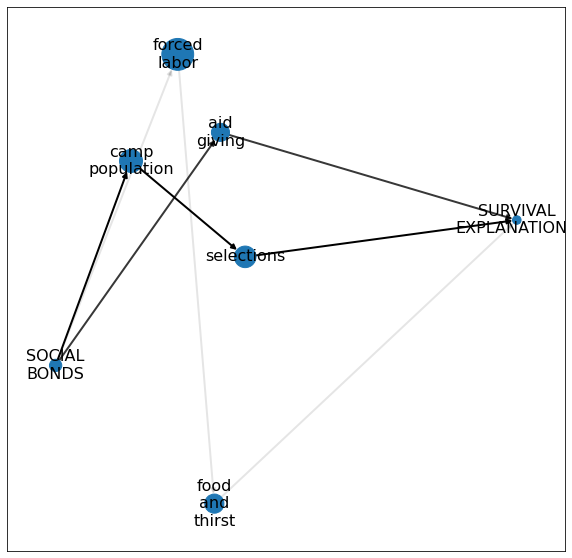

In [159]:

story_start = ['social bonds']
story_end = ['survival explanations']
flux = 0.18
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

## Observation 18

### Qualitative description

In narratives of those men and women who worked, social relations and forced labor are more connected for men:

social relations-forced labor
Women: 7.786906600083256
Men: 11.051234286602039

forced labor-social relations
Women: 10.931980703238628
Men: 11.027089792748091



### Quantitative evidence

In [160]:
flux = 1
story_start = 'social bonds'
story_end = 'forced labor'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [161]:
print_similar_paths(flux_w,flux_m,max_length=2)

social bonds-forced labor
Women: 13.920940512851436
Men: 13.251553830809254




In [162]:
flux = 1
story_start = 'forced labor'
story_end = 'social bonds'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [163]:
print_similar_paths(flux_w,flux_m,max_length=2)

forced labor-social bonds
Women: 10.310329336866596
Men: 13.969706712803152




### Visualize 

3 labels to show
3 labels to show


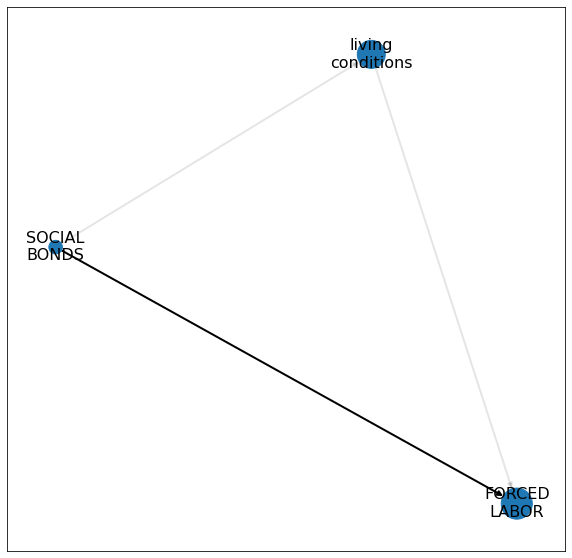

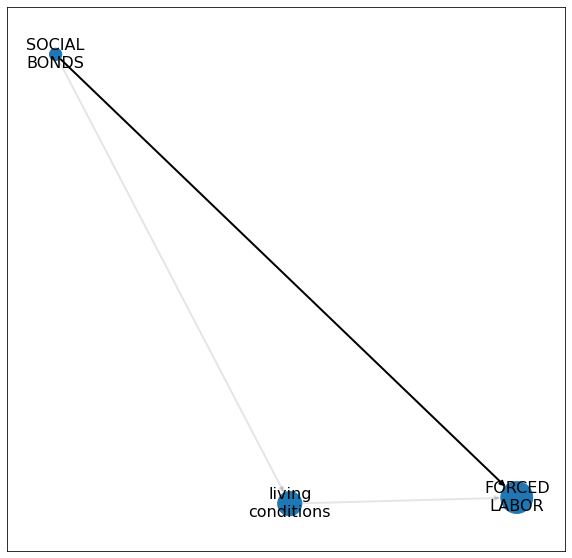

In [164]:

story_start = ['social bonds']
story_end = ['forced labor']
flux = 0.18
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

0
1


/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pw, 'r'+linestyle,label='women',c="#ff7f0e")
/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pm, 'b'+linestyle,label='men', c="#1f77b4")


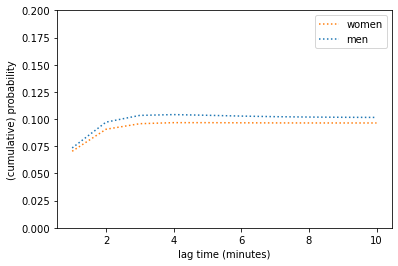

In [165]:




_msmlags = np.arange(1, 11)

topic_1 = ['forced labor']
topic_2= ['social bonds','friends']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 18 B

### Qualitative description

In narratives of those men and women who worked, friends and living conditions are  more connected  for women than for men:

social relations-living conditions


living conditions-friends
Women: 3.499585921266175
Men: 1.665785919545009

### Quantitative evidence

flux = 0.4
story_start = 'living conditions'
story_end = 'friends'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

print_similar_paths(flux_w,flux_m,max_length=3)

### Visualize


story_start = ['friends']
story_end = ['living conditions']
flux = 0.4
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3





_msmlags = np.arange(1, 11)

topic_1 = topic_map_living_conditions
topic_2= ['friends']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 19

### Qualitative description

Forced labor and aid giving are strongly and more or less equally connected for those women and men who worked. Generally, we see a strong connection between forced labor and aid giving.

### Quantitative evidence

In [166]:
flux = 1
story_start = 'forced labor'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [167]:
print_similar_paths(flux_w,flux_m,max_length=2)

forced labor-aid giving
Women: 18.75729989183722
Men: 19.01376351078398




In [168]:
flux = 1
story_start = 'aid giving'
story_end = 'forced labor'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [169]:
print_similar_paths(flux_w,flux_m,max_length=2)

aid giving-forced labor
Women: 12.117624539292757
Men: 15.901057941109645




## Observation 20

### Qualitative description

Living conditions and food sharing are more connected for those women who worked than those men who worked. For instance, for women 6.6% is going through the following paths:

living conditions-food-food sharing

and 3.5% through the following one:

living conditions-food sharing

In testimonies of men, direct path was not found, instead the traffic is going through the following two paths:

living conditions-social relations-food sharing
2 %

living conditions-aid giving-food sharing
1.3 %


### Quantitative evidence

flux = 1
story_start = 'living conditions'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

print_paths(flux_w,max_length=3)

print_paths(flux_m,max_length=3)

print_similar_paths(flux_w,flux_m,max_length=4)

### Quantitative evidence 3





_msmlags = np.arange(1, 11)

topic_1 = ['living conditions']
topic_2= ['food sharing']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 21

### Qualitative description

Forced labor and food sharing are more connected for men who worked than those women who worked. For instance, for women 13.3% is going through the following paths:

forced labor-food sharing

for men it is 22%

In case of aid giving the difference is slighter:

forced labor-aid giving

for women it is 15.965854319863244

and for men it 16.98


### Quantitative evidence

flux = 0.3
story_start = 'forced labor'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

print_similar_paths(flux_w,flux_m,max_length=2)

flux = 0.3
story_start = 'forced labor'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


print_similar_paths(flux_w,flux_m,max_length=2)

### Quantitative evidence 3





_msmlags = np.arange(1, 11)

topic_1 = ['forced labor']
topic_2= ['food sharing']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)





_msmlags = np.arange(1, 11)

topic_1 = ['forced labor']
topic_2= ['aid giving']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 22

### Qualitative description

Those men who did not work are more likely to connect stealing and camp living conditions.

### Quantitative evidence

In [170]:
flux = 0.2
story_start = 'living conditions'
story_end = 'stealing'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [171]:
print_similar_paths(flux_w,flux_m)

living conditions-stealing
Women: 12.085170756058137
Men: 24.31875333047022




In [172]:
flux = 0.2
story_start = 'stealing'
story_end = 'living conditions'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [173]:
print_similar_paths(flux_w,flux_m)

stealing-food and thirst-living conditions
Women: 5.4820707144730765
Men: 5.975424954301289


stealing-living conditions
Women: 8.077031584450744
Men: 9.30557695431711




### Quantitative evidence 3

0
1


/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pw, 'r'+linestyle,label='women',c="#ff7f0e")
/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pm, 'b'+linestyle,label='men', c="#1f77b4")


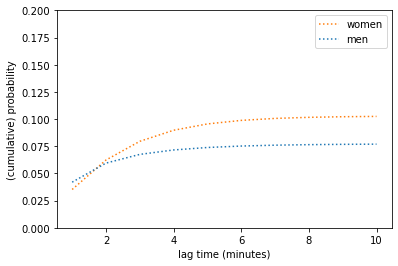

In [174]:




_msmlags = np.arange(1, 11)

topic_1 = ['living conditions']
topic_2= ['stealing']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 23

### Qualitative description

In narratives of women, preferential treatment is more likely to lead to survival explanation.

### Quantitative evidence

In [175]:
flux = 1
story_start = 'preferential treatment'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [176]:
print_paths(flux_w,max_length=2)

preferential treatment-survival explanations:2.9586471189725434




In [177]:
print_paths(flux_m,max_length=2)

preferential treatment-survival explanations:0.9291048668965467




### Quantitative evidence 3

0
1


/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pw, 'r'+linestyle,label='women',c="#ff7f0e")
/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pm, 'b'+linestyle,label='men', c="#1f77b4")


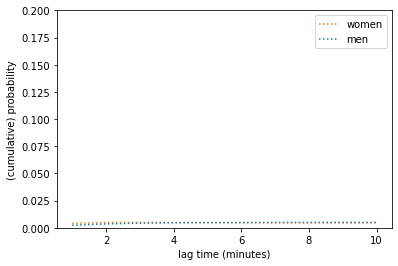

In [178]:




_msmlags = np.arange(1, 11)

topic_1 = ['preferential treatment']
topic_2= ['survival explanations']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 24 A

### Qualitative description

In narratives of women, preferential treatment is more likely to be preceded by living conditions:

living conditions-preferential treatment
Women: 3.267726057364454
Men: 1.9161261348630667



### Quantitative evidence

In [179]:
flux = 1
story_start = 'living conditions'
story_end = 'preferential treatment'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [180]:
print_similar_paths(flux_w,flux_m)

living conditions-transportation-perpetrators-preferential treatment
Women: 0.650467082860932
Men: 0.996674620803259


living conditions-preferential treatment
Women: 5.213053616289304
Men: 3.2461747349080334


living conditions-deaths-preferential treatment
Women: 0.49689592646022035
Men: 0.44033357867705886


living conditions-aid giving-preferential treatment
Women: 2.21432136745527
Men: 1.9414261339553593


living conditions-religion-preferential treatment
Women: 0.8190414825465042
Men: 0.7434587134472533


living conditions-medical experiments-preferential treatment
Women: 0.36737756869439747
Men: 0.2960505174316512


living conditions-resistance-preferential treatment
Women: 0.06422222912764451
Men: 0.23167356604881667


living conditions-cultural activities-preferential treatment
Women: 0.24836388898098738
Men: 0.37106061022803616


living conditions-deceptions-preferential treatment
Women: 0.38092876888933397
Men: 0.60606242747428


living conditions-transfer-preferential treat

### Quantitative evidence 3

0
1


/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pw, 'r'+linestyle,label='women',c="#ff7f0e")
/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_91648/328020635.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(_msmlags, _pm, 'b'+linestyle,label='men', c="#1f77b4")


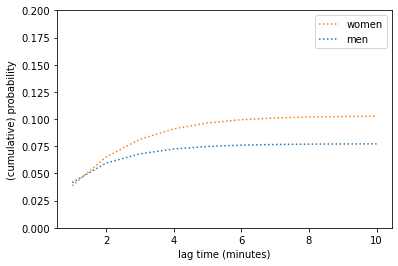

In [181]:




_msmlags = np.arange(1, 11)

topic_1 = ['living conditions']
topic_2= ['preferential treatment']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 24

### Qualitative description

In narratives of women, Blockalteste is more connected to survival explanations;

Blockälteste-survival explanations
Women: 1.5644480047580056
Men: 0.8118622824526782

### Quantitative evidence

flux = 1
story_start = 'Blockälteste'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

print_paths(flux_w,max_length=3)

print_paths(flux_m,max_length=3)

print_similar_paths(flux_w,flux_m)

### Quantitative evidence 3





_msmlags = np.arange(1, 11)

topic_2 = ['survival explanations']
topic_1= ['Blockälteste']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)